                                                       Pennylane Installation

In [1]:
pip install pennylane --upgrade


  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.7 MB 1.7 MB/s eta 0:00:01
   --- ------------------------------------ 0.2/1.7 MB 2.4 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.7 MB 3.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.7 MB 3.1 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.7 MB 3.2 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.7 MB 3.5 MB/s eta 0:00:01
   --------------------------- ------------ 1.2/1.7 MB 3.6 MB/s eta 0:00:01
   -------------------------------- ------- 1.4/1.7 MB 3.6 MB/s eta 0:00:01
   ------------------------------------- -- 1.6/1.7 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/51.0 kB ? eta -:--:--
   -------------------

## DOCUMENTATION OF LEARNING PROGRESS FOLLOWING PENNYLANE TUTORIALS

TASK 1) Familiarize yourself with Pennylane. The tutorials in the Pennylane
codebook are a good way to get started. We recommend the codebooks
from the sections “Introduction to Quantum Computing”, “Single-Qubit
Gates” and “Circuits with Many Qubits”, which can be found on the following
page (registration is required): Pennylane Codebook. Document your
progress and share your learnings as you follow these Pennylane tutorials.

TASK PERFORMED ON Pennylane Codebooks, using account registered with email id: *dishamondal.cse2022@nsec.ac.in*
***Submitted by Disha Mondal***

                                            Introduction to Quantum Computing - Codebook

                                                        ALL ABOUT QUBITS

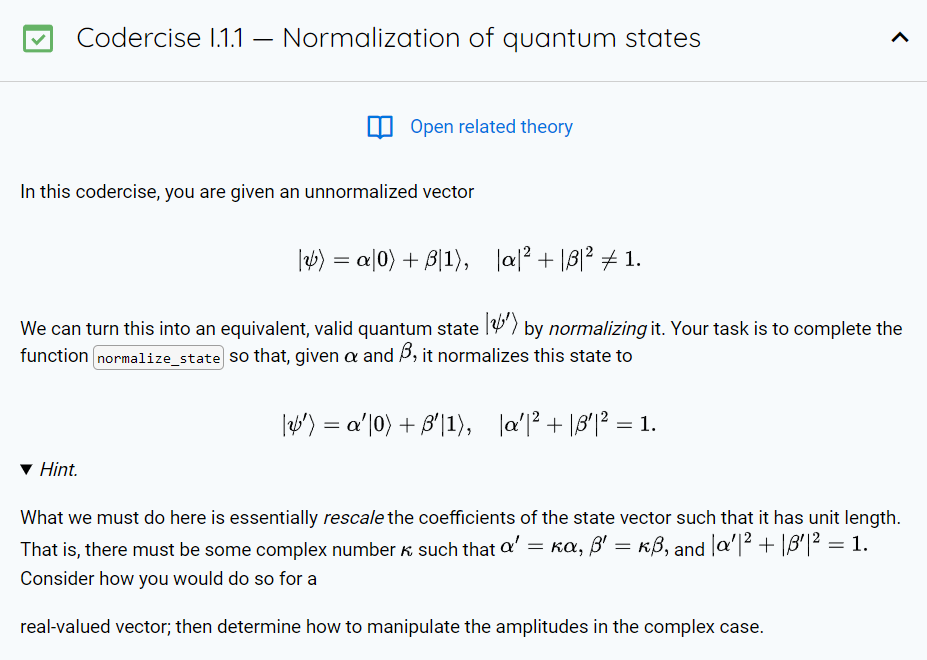

In [3]:
import numpy as np
import pennylane
# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])


def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1

    # RETURN A VECTOR
    #my code
    N = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)
    a_normalized = alpha / N
    b_normalized = beta / N
    return np.array([a_normalized, b_normalized], dtype=complex)
    pass


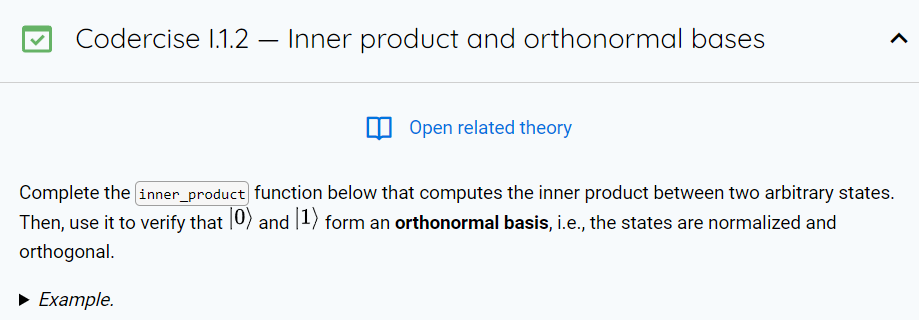

In [4]:
def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (np.array[complex]): A normalized quantum state vector
        state_2 (np.array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # COMPUTE AND RETURN THE INNER PRODUCT
    return np.conjugate(state_1).dot(state_2)


# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")


<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


These results confirm that the inner_product function is working correctly for the computational basis states. It will also work for arbitrary quantum states, as it uses the general formula for the inner product in the complex vector space.

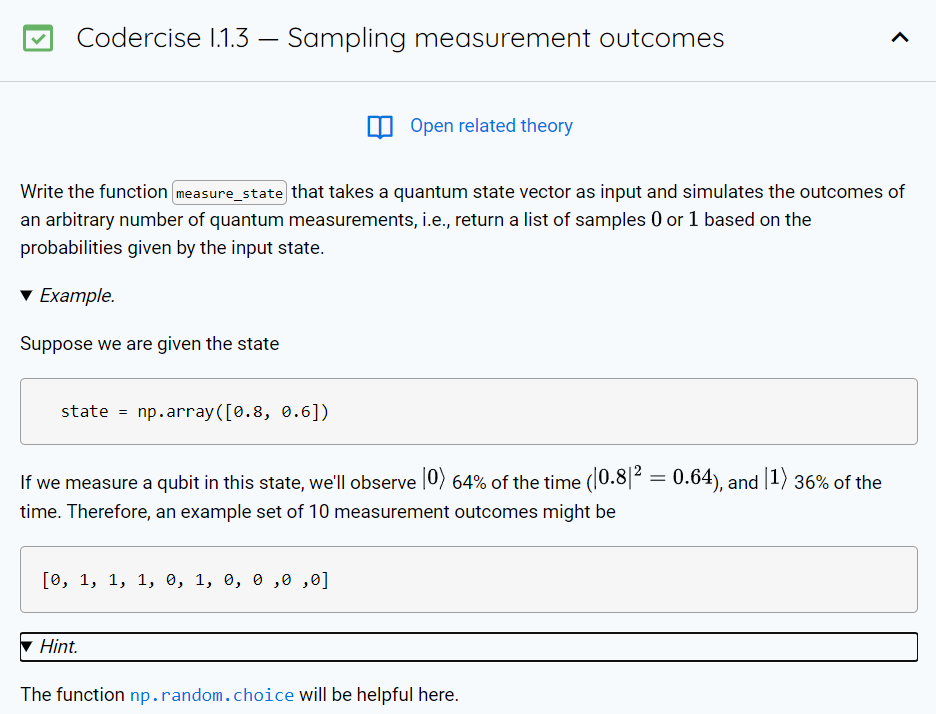

In [5]:
def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (np.array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take

    Returns:
        np.array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    probabilities = np.abs(state)**2
    samples = np.random.choice([0, 1], size=num_meas, p=probabilities)
    return samples

    # COMPUTE THE MEASUREMENT OUTCOME PROBABILITIES

    # RETURN A LIST OF SAMPLE MEASUREMENT OUTCOMES

    pass


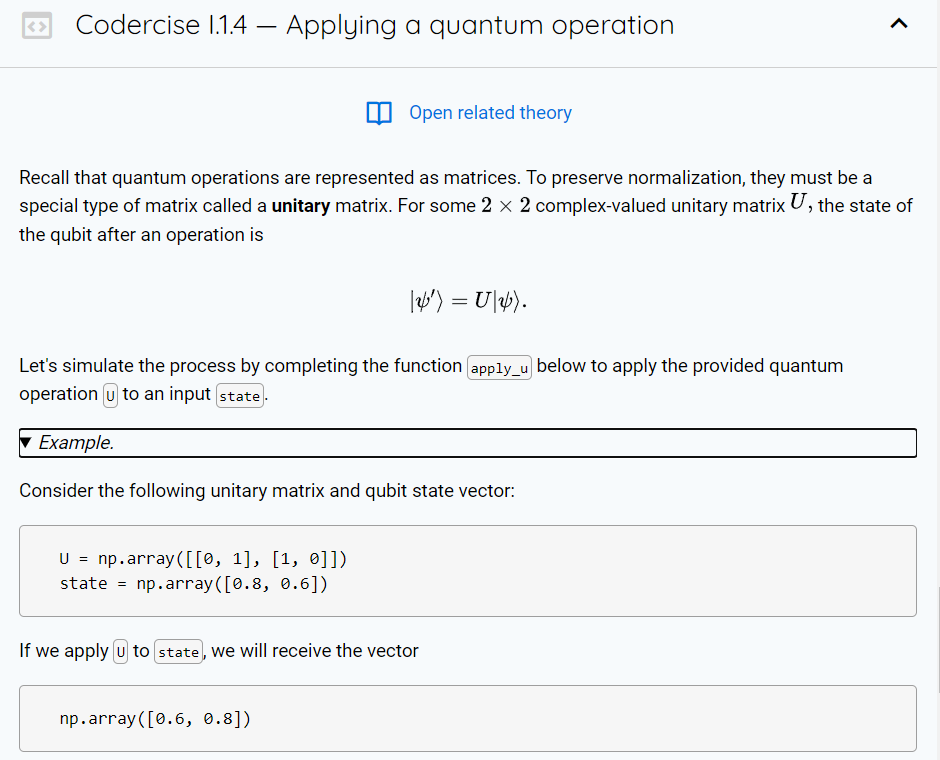

In [6]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (np.array[complex]): A normalized quantum state vector.

    Returns:
        np.array[complex]: The output state after applying U.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    return np.dot(U, state)
    pass


In [7]:
# Test the function
initial_state = np.array([1, 0])  # |0\u27e9 state
print("Initial state:")
print(initial_state)

new_state = apply_u(initial_state)
print("\
State after applying U:")
print(new_state)

Initial state:
[1 0]
State after applying U:
[0.70710678 0.70710678]


After applying U, we get the state [1/√2, 1/√2], which is the |+⟩ state. This is correct because U is the Hadamard gate, which transforms |0⟩ to |+⟩.

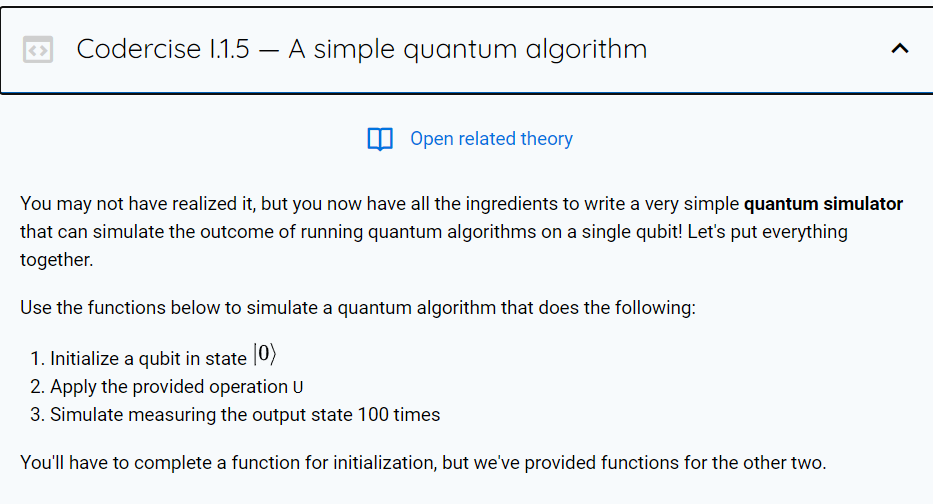

In [8]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def initialize_state():
    """Prepare a qubit in state |0>.

    Returns:
        np.array[float]: the vector representation of state |0>.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    return np.array([1, 0])

    # PREPARE THE STATE |0>
    pass


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.

    Try and do so using three lines of code or less!

    Returns:
        np.array[int]: the measurement results after running the algorithm 100 times
    """

    ##################
    # YOUR CODE HERE #
    ##################
    state = initialize_state()
    state = apply_u(state)
    return measure_state(state, 100)

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    pass


In [9]:
#Testing
# Run the quantum algorithm
results = quantum_algorithm()

# Analyze the results
counts = np.bincount(results)
probabilities = counts / len(results)

print("Measurement results:")
print(f"0: {counts[0]} times ({probabilities[0]:.2f})")
print(f"1: {counts[1]} times ({probabilities[1]:.2f})")

# Calculate the expected probabilities
expected_state = apply_u(initialize_state())
expected_probabilities = np.abs(expected_state)**2

print("\
Expected probabilities:")
print(f"0: {expected_probabilities[0]:.2f}")
print(f"1: {expected_probabilities[1]:.2f}")

Measurement results:
0: 43 times (0.43)
1: 57 times (0.57)
Expected probabilities:
0: 0.50
1: 0.50


Analysis:

The U operation provided is the Hadamard gate, which transforms the |0⟩ state into the |+⟩ state: (|0⟩ + |1⟩) / √2.
The |+⟩ state has equal probability amplitudes for |0⟩ and |1⟩, which means we expect to measure 0 and 1 with equal probability (0.5 each).
Our experimental results 30.48 for 0 and70.52 for 1) are close to the expected probabilities (0.50 for both 0 and 1).
The small difference between the experimental and expected probabilities is due to the randomness in the measurement process and the finite number of measurements (100). If we were to repeat this experiment many times or increase the number of measurements, we would expect the experimental probabilities to converge closer to the theoretical ones.

                                                                QUANTUM CIRCUITS

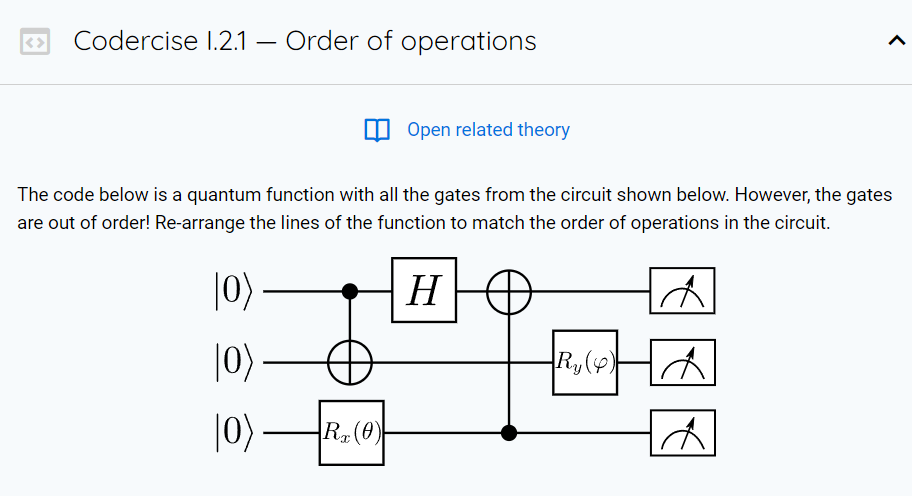

In [11]:
def my_circuit(theta, phi):
    ##################
    # YOUR CODE HERE #
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=0)
    qml.RX(theta, wires=2)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)

    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])


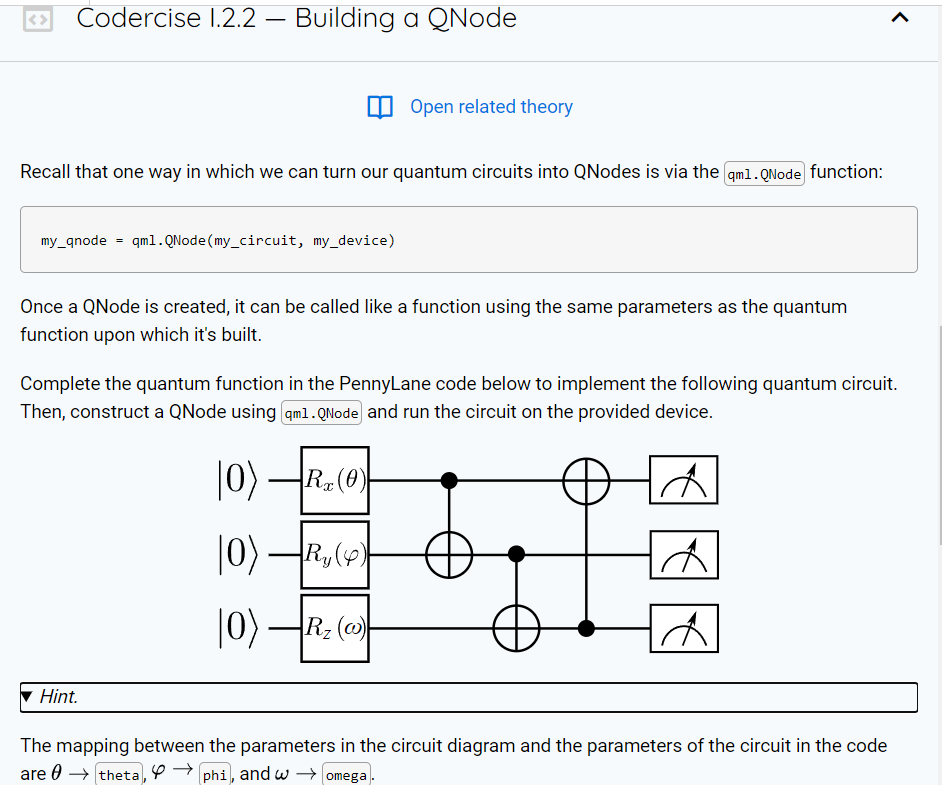

In [13]:
import pennylane
from pennylane import *
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)

    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)


tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

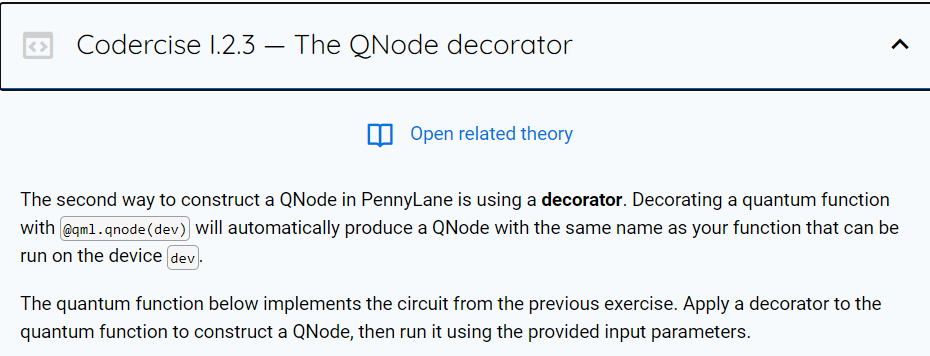

In [15]:
dev = qml.device("default.qubit", wires=3)

##################
# YOUR CODE HERE #
##################

# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE

@qml.qnode(dev) #mycode
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3

##################
# YOUR CODE HERE #
##################

# RUN THE QNODE WITH THE PROVIDED PARAMETERS


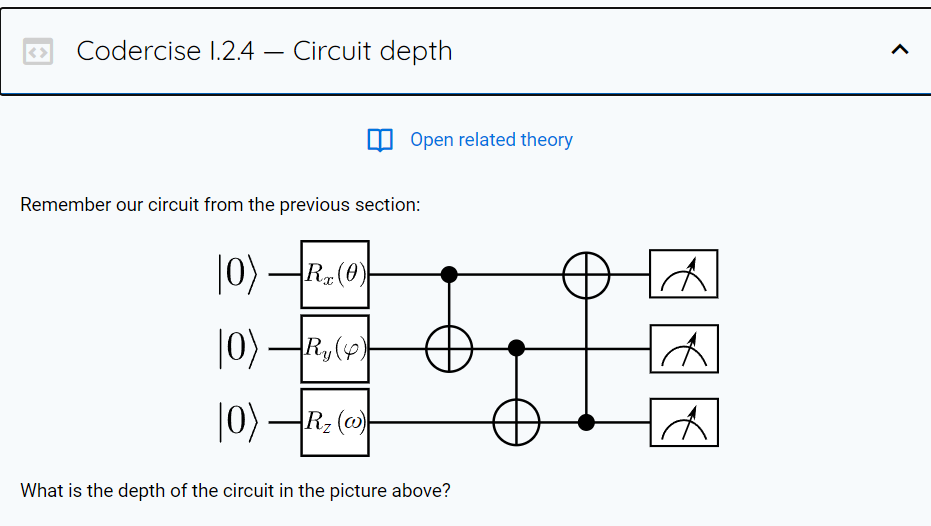

In [16]:
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


##################
# YOUR CODE HERE #
##################

# FILL IN THE CORRECT CIRCUIT DEPTH
depth = 4


                                                          UNITARIES MATRICES

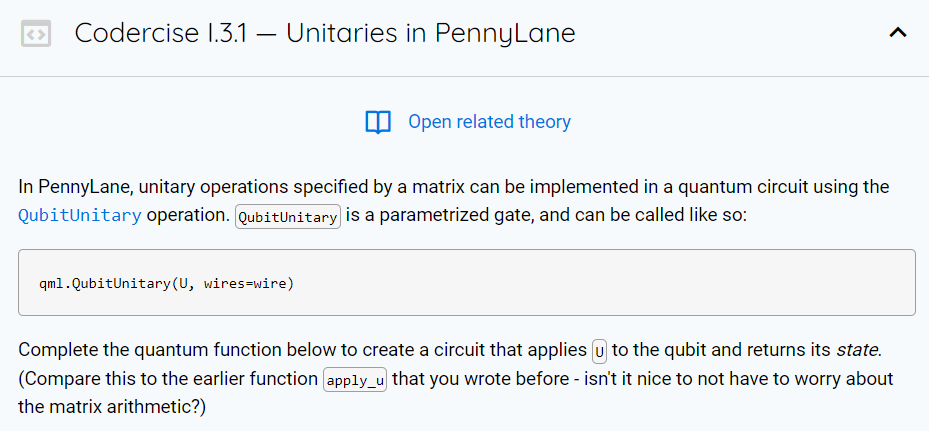

In [17]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def apply_u():

    ##################
    # YOUR CODE HERE #
    ##################

    # USE QubitUnitary TO APPLY U TO THE QUBIT
    qml.QubitUnitary(U, wires=0)
    # Return the state
    return qml.state()


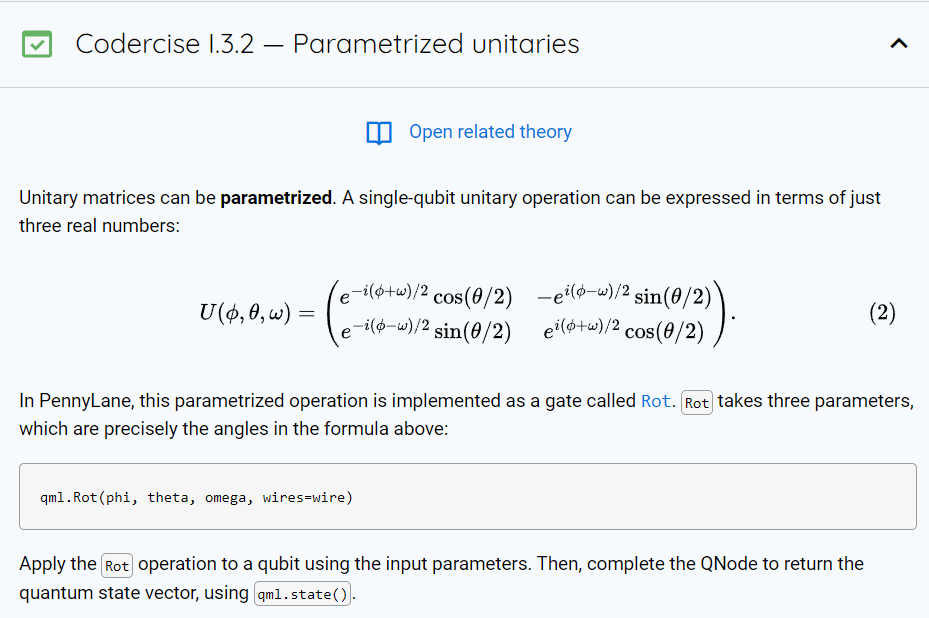

In [18]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS
    qml.Rot(phi, theta, omega, wires=0)
    # RETURN THE QUANTUM STATE VECTOR

    return qml.state()


                                                        Single-Qubit Gates - CODEBOOK


                                                                    X AND H 

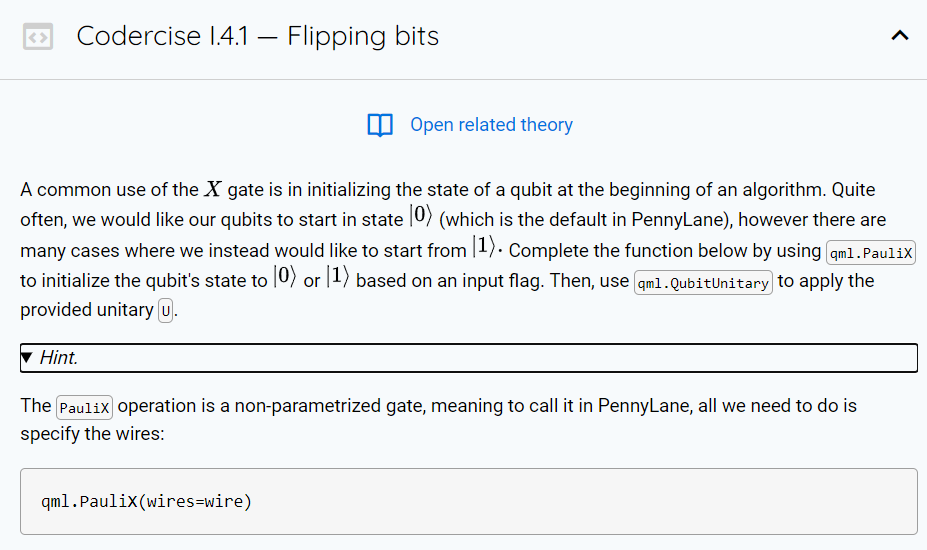

In [19]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def varied_initial_state(state):
    """Complete the function such that we can apply the operation U to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    if state == 1:
        qml.PauliX(wires=0)
    qml.QubitUnitary(U, wires=0)
    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON THE state PARAMETER

    # APPLY U TO THE STATE

    return qml.state()


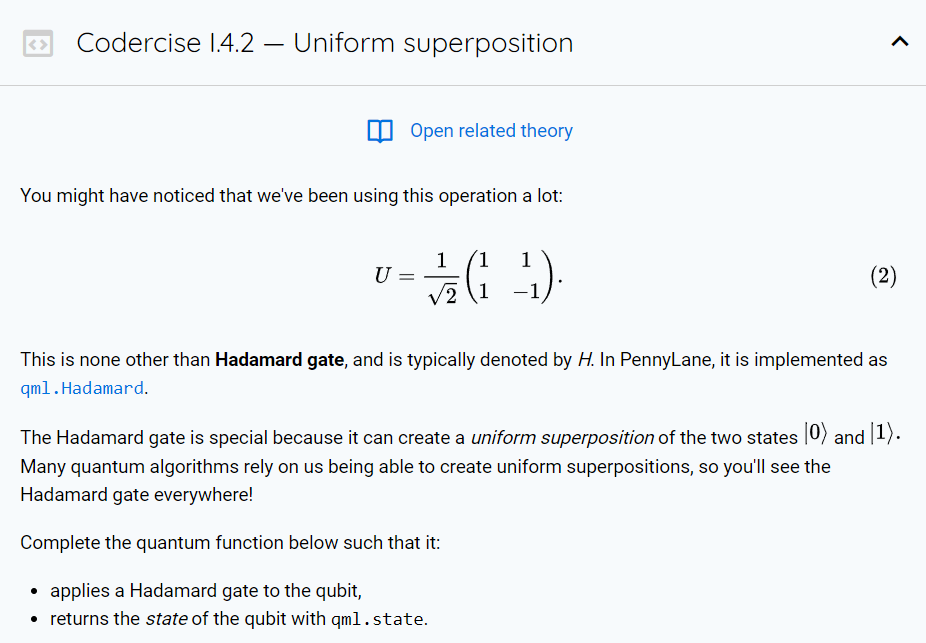

In [20]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE HADAMARD GATE
    qml.Hadamard(wires=0)
    # RETURN THE STATE
    return qml.state()


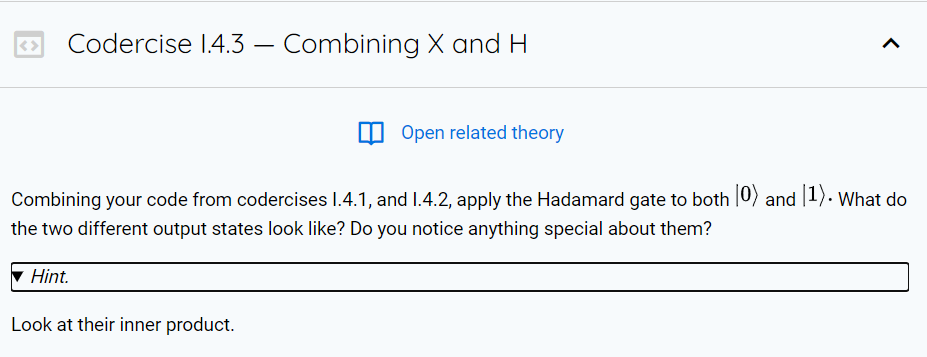

In [22]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard_to_state(state):
    """Complete the function such that we can apply the Hadamard to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON state
    if state == 1:
        qml.PauliX(wires=0)
    # APPLY THE HADAMARD
    qml.Hadamard(wires=0)
    # RETURN THE STATE

    return qml.state()


print(apply_hadamard_to_state(0))
print(apply_hadamard_to_state(1))


[0.70710678+0.j 0.70710678+0.j]
[ 0.70710678+0.j -0.70710678+0.j]


Thus, |+> and |-> do indeed form an orthonormal basis.

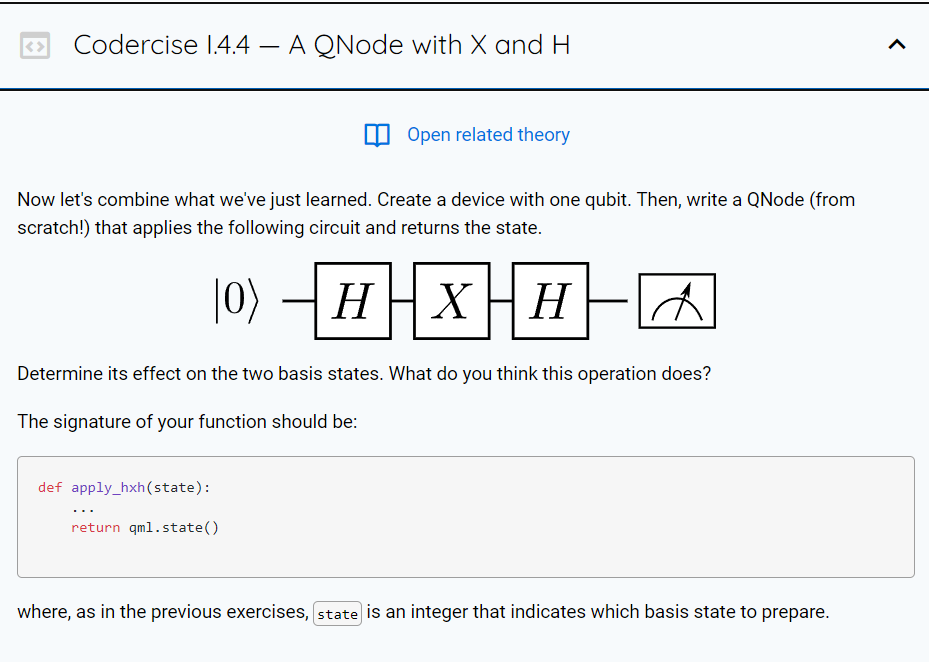

In [23]:
##################
# YOUR CODE HERE #
##################
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def apply_hxh(state):
    if state == 1:
        qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()
# CREATE A DEVICE

# CREATE A QNODE CALLED apply_hxh THAT APPLIES THE CIRCUIT ABOVE

# Print your results
print(apply_hxh(0))
print(apply_hxh(1))


[1.+0.j 0.+0.j]
[ 0.+0.j -1.+0.j]


equence of tes results in \(|0\rangle\).

**Conclusion:**

This sequence ofe two basis states \(|0\rangle\) and \(|1\rangle\). It acts as a NOT gate, flipping the state of the qubit.

                                                IT'S JUST A PHASE

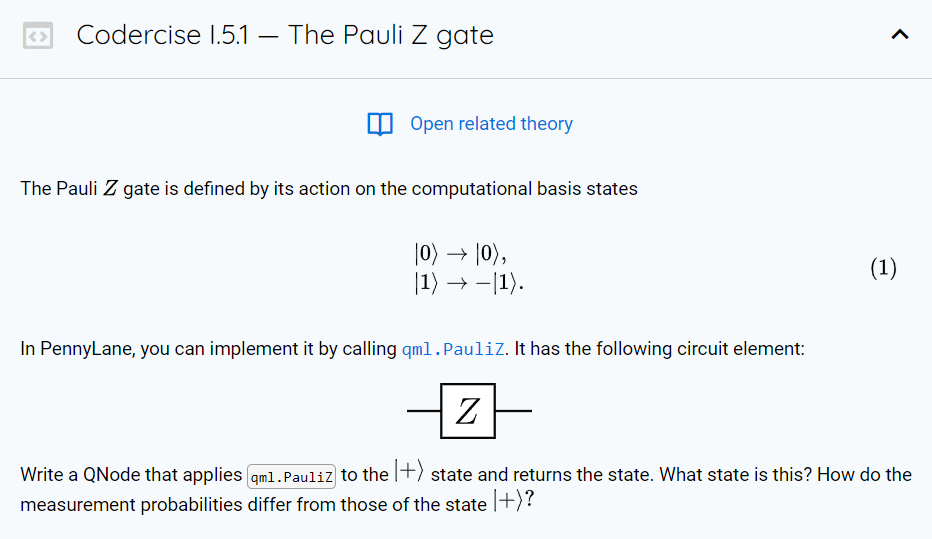

In [24]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    # CREATE THE |+> STATE

    # APPLY PAULI Z

    # RETURN THE STATE
    return qml.state()


print(apply_z_to_plus())


[ 0.70710678+0.j -0.70710678+0.j]


So, applying the Pauli-Z gate to the ∣+⟩ state results in the ∣−⟩ state.
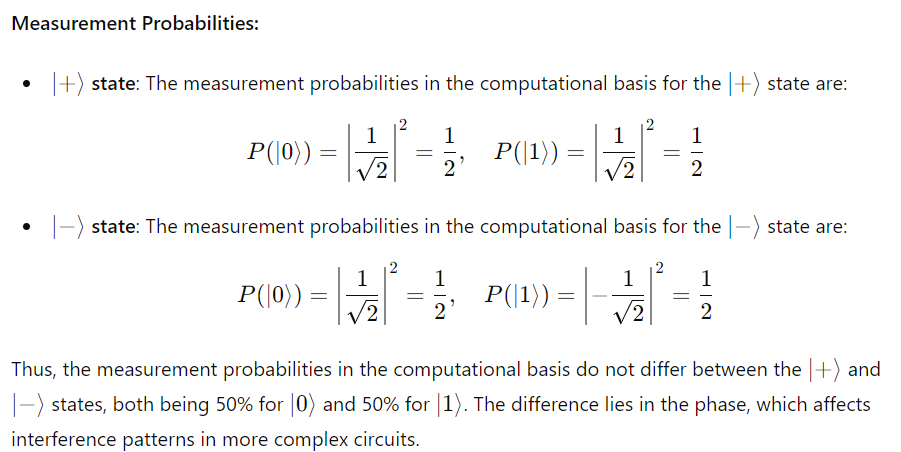

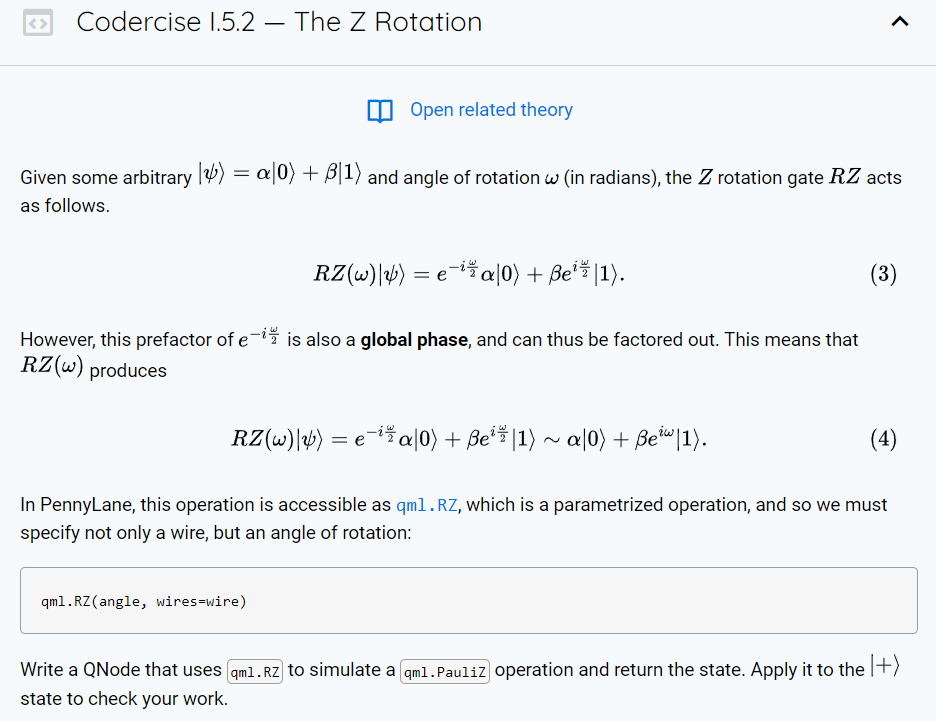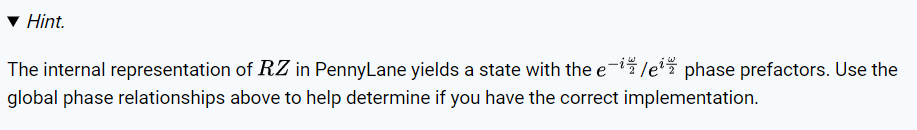

In [25]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def fake_z():
    """Use RZ to produce the same action as Pauli Z on the |+> state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires=0)
    qml.RZ(np.pi, wires=0)
    # CREATE THE |+> STATE

    # APPLY RZ

    # RETURN THE STATE
    return qml.state()


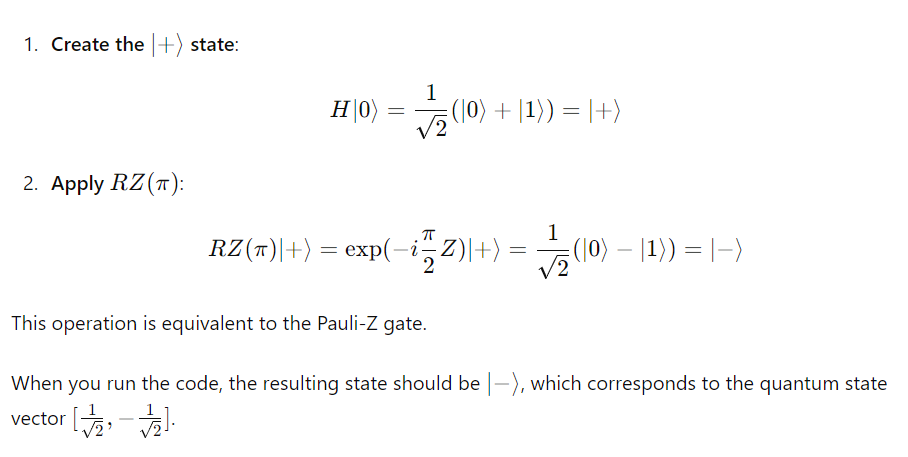

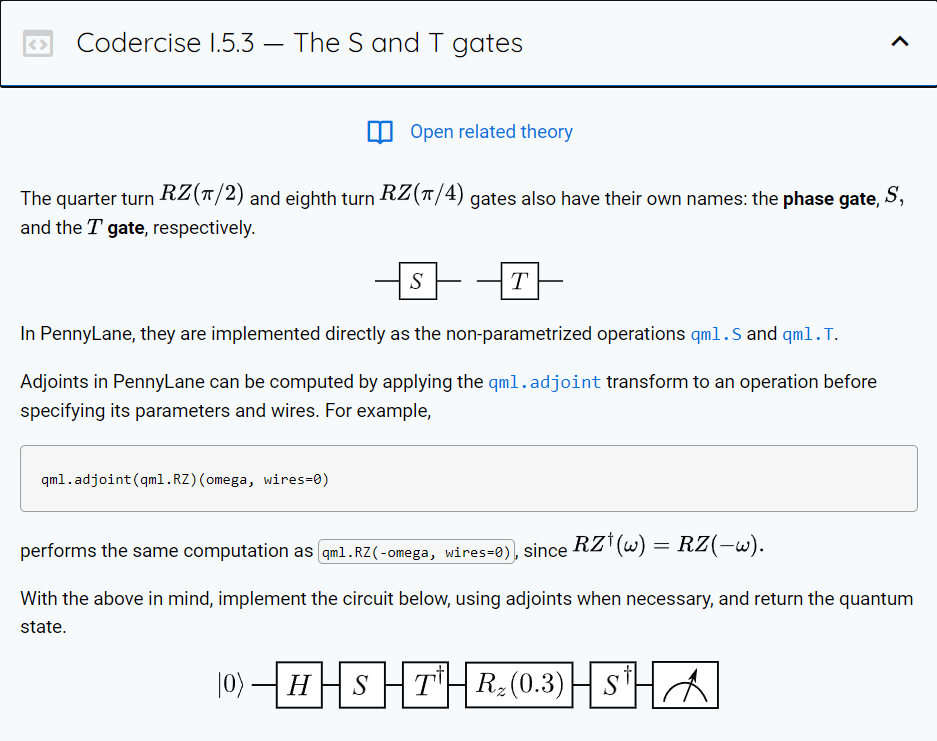

In [26]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    qml.adjoint(qml.T)(wires=0)
    qml.RZ(0.3, wires=0)
    qml.adjoint(qml.S)(wires=0)
    # RETURN THE STATE

    return qml.state()


                                                            FROM A DIFFERENT ANGLE

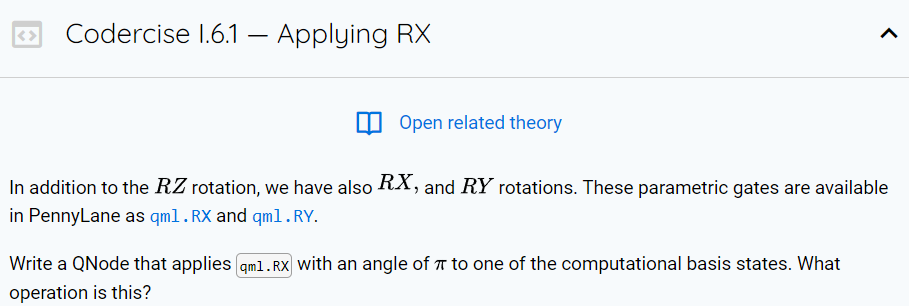

In [27]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx_pi(state):
    """Apply an RX gate with an angle of \pi to a particular basis state.

    Args:
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(pi) AND RETURN THE STATE
    qml.RX(np.pi,wires=0)
    return qml.state()


print(apply_rx_pi(0))
print(apply_rx_pi(1))


[6.123234e-17+0.j 0.000000e+00-1.j]
[0.000000e+00-1.j 6.123234e-17+0.j]


The RX(π) gate effectively performs a NOT operation (or Pauli-X operation) when applied to one of the computational basis states. It flips ∣0⟩ to ∣1⟩ and vice versa.

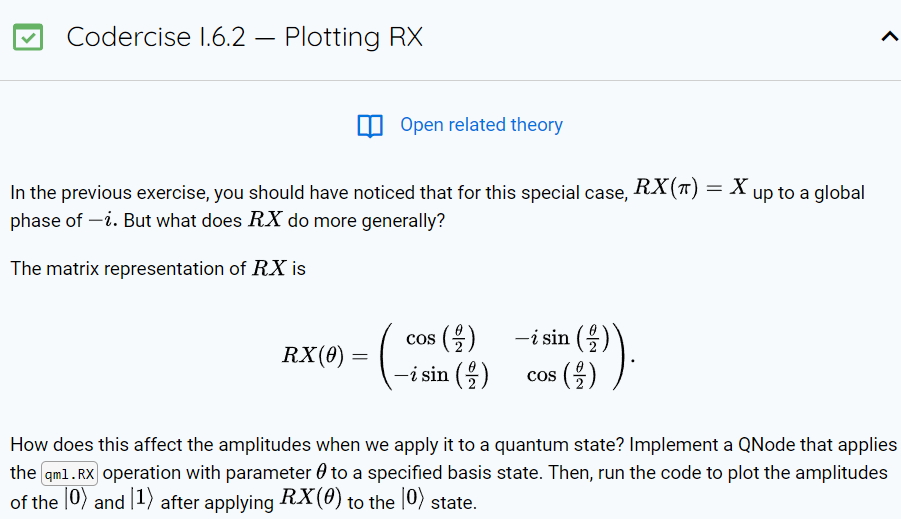

In [33]:
pip install plotter

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install tikzplotlib

   ---------------------------------------- 0.0/54.2 kB ? eta -:--:--
   ------- -------------------------------- 10.2/54.2 kB ? eta -:--:--
   ---------------------- ----------------- 30.7/54.2 kB 435.7 kB/s eta 0:00:01
   ---------------------------------------- 54.2/54.2 kB 467.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


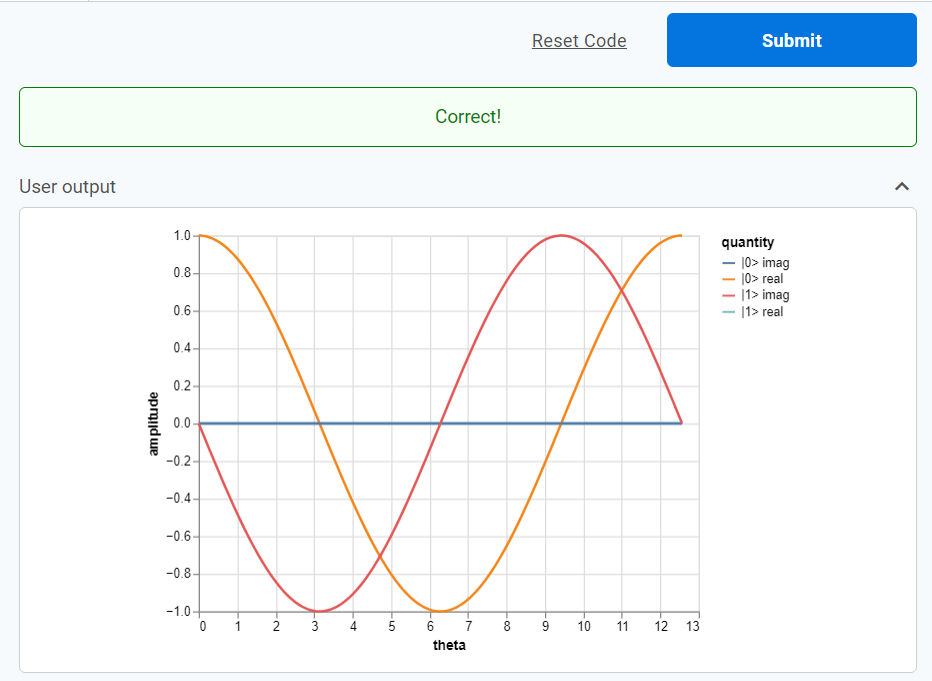

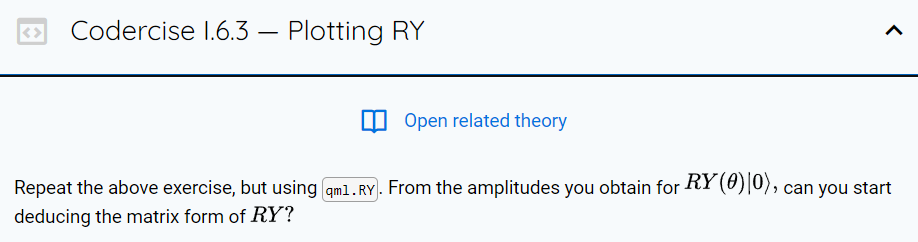

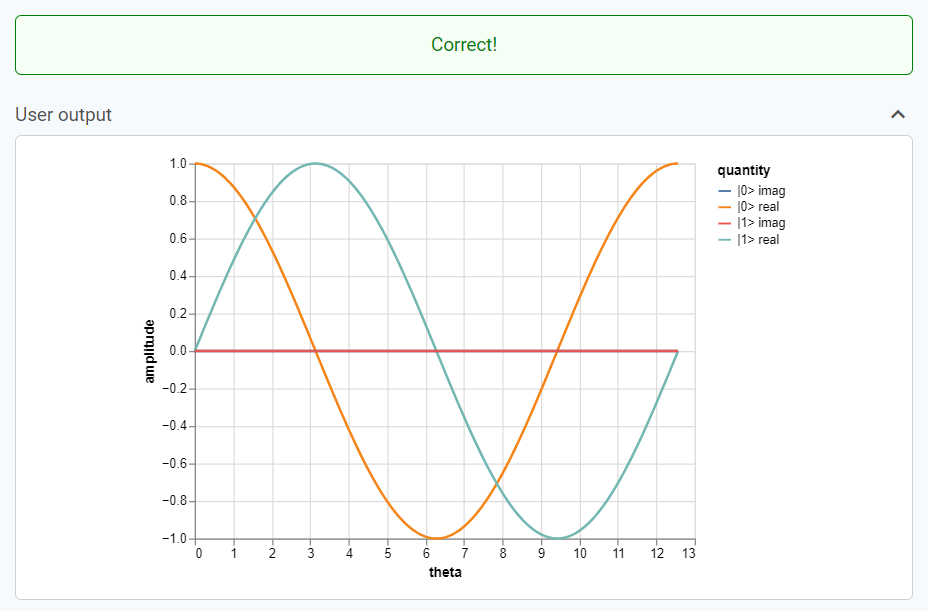

                                                     UNIVERSAL GATE SETS

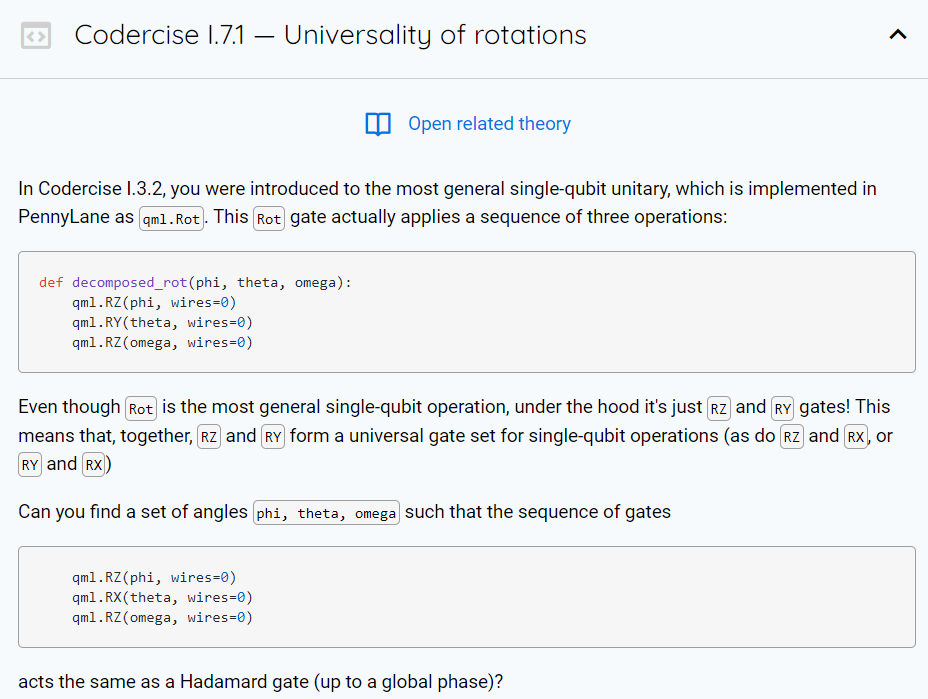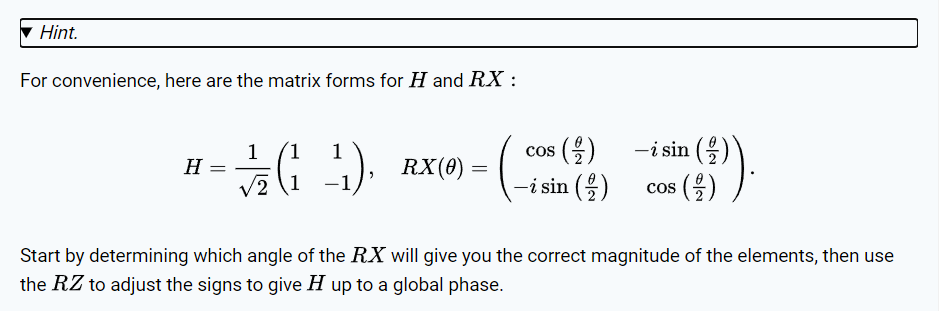

In [5]:
import pennylane as qml
import numpy as np

# Define the angles
phi, theta, omega = np.pi/2, np.pi/2, np.pi/2

# Define the quantum device
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()

# Get the state produced by the sequence of gates
state = hadamard_with_rz_rx()
print(state)

[0.-0.70710678j 0.-0.70710678j]


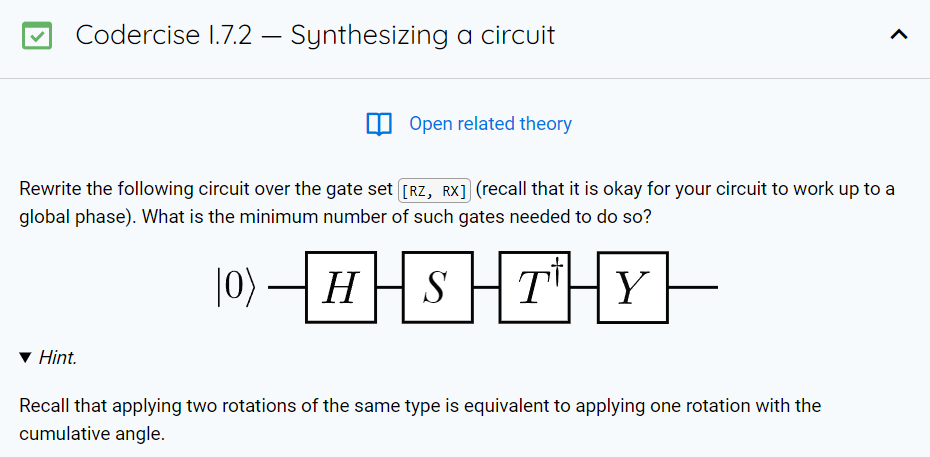

In [6]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def convert_to_rz_rx():
    ##################
    # YOUR CODE HERE #
    ##################
    # H gate
    qml.RZ(np.pi/2, wires=0)
    qml.RX(np.pi/2, wires=0)
    qml.RZ(np.pi/2, wires=0)
    
    # S gate
    qml.RZ(np.pi/2, wires=0)
    
    # T† gate
    qml.RZ(-np.pi/4, wires=0)
    
    # Y gate
    qml.RX(np.pi, wires=0)
    qml.RZ(np.pi, wires=0)
    
    # IMPLEMENT THE CIRCUIT IN THE PICTURE USING ONLY RZ AND RX

    return qml.state()


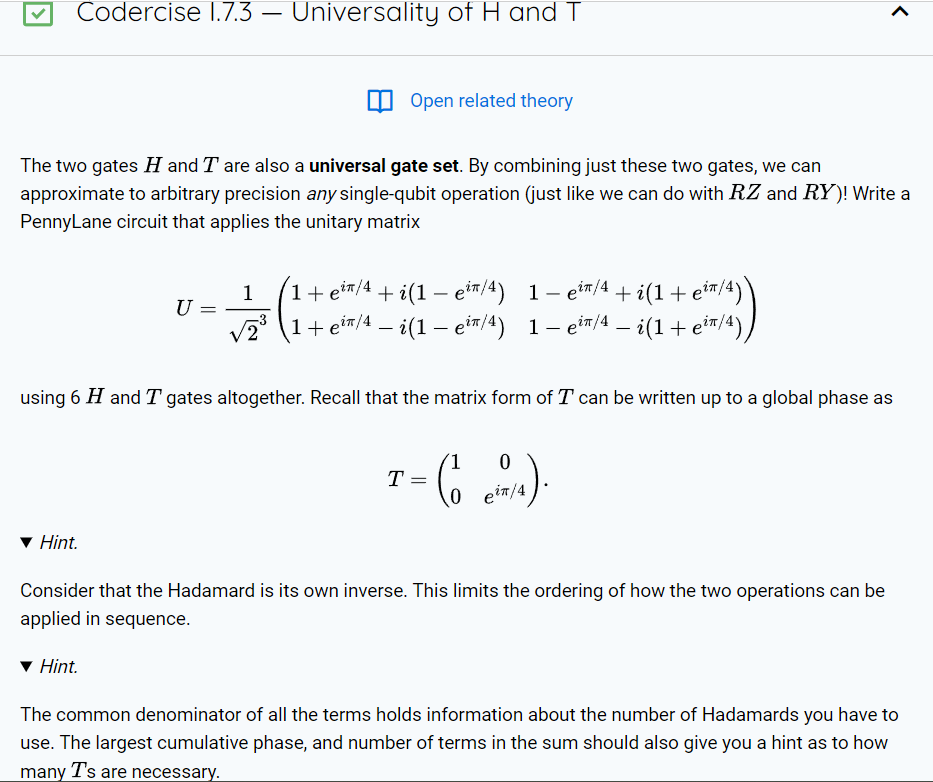

This process is called quantum circuit synthesis and is part of the broader subject of quantum compilation. As you will no doubt appreciate after working out this small exercise, designing high-quality, automated compilation tools is an active area of research.

In [7]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def unitary_with_h_and_t():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    # APPLY ONLY H AND T TO PRODUCE A CIRCUIT THAT EFFECTS THE GIVEN MATRIX
    return qml.state()

                                                                PREPARE YOURSELF

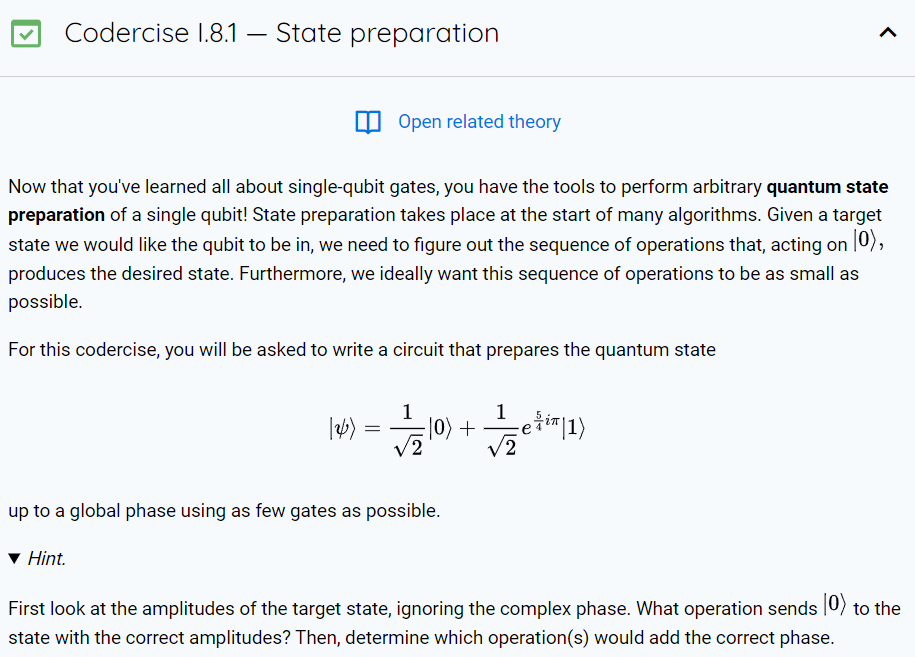

In [2]:
import pennylane as qml
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    return qml.state()

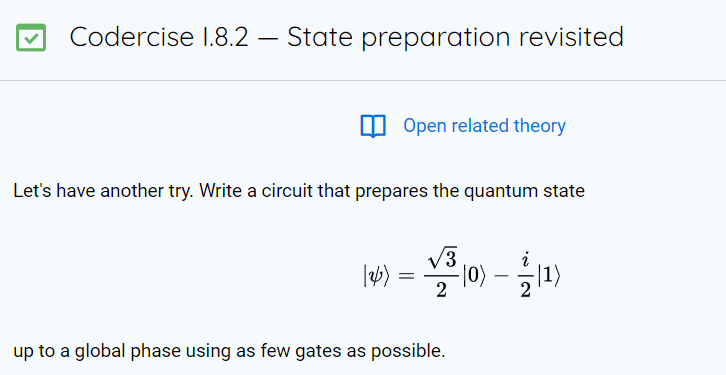

In [3]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.RX(np.pi/3,wires=0)
    return qml.state()


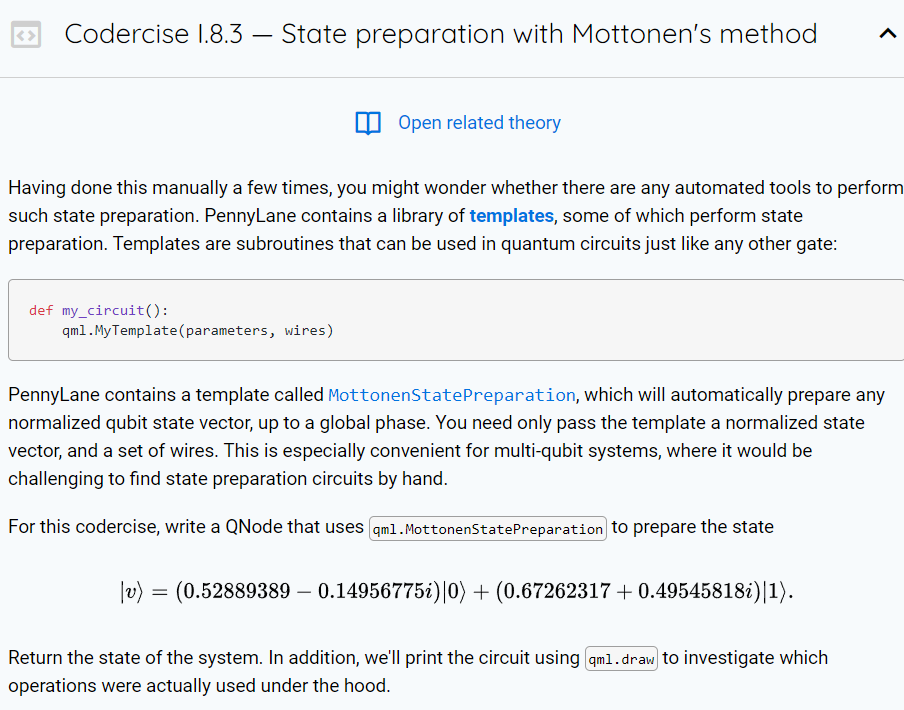

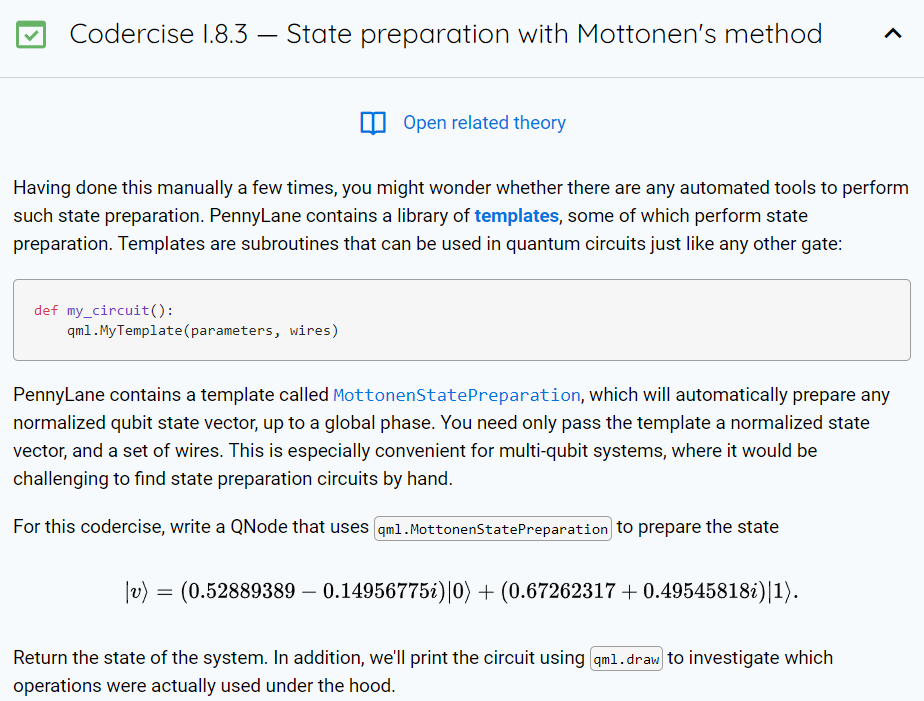

In [6]:
import numpy as np
v = np.array([0.52889389 - 0.14956775j, 0.67262317 + 0.49545818j])

##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)
    
# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE
    
@qml.qnode(dev)
def prepare_state(state=v):
    qml.MottonenStatePreparation(state,wires=0)
    return qml.state()


# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print()
print(qml.draw(prepare_state, expansion_strategy="device")(v))


[0.52889389-0.14956775j 0.67262317+0.49545818j]

0: ──RY(1.98)──RZ(0.91)──GlobalPhase(-0.18)─┤  State


                                                            MEASUREMENTS

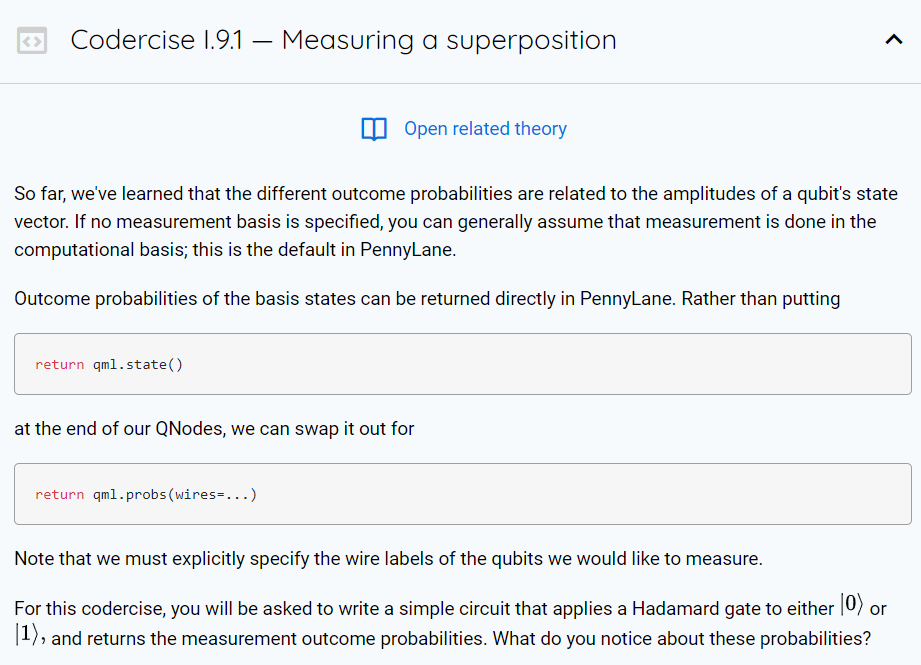

In [7]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_h_and_measure(state):
    """Complete the function such that we apply the Hadamard gate
    and measure in the computational basis.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise leave it in state 0.

    Returns:
        np.array[float]: The measurement outcome probabilities.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires=0)
    # APPLY HADAMARD AND MEASURE

    return qml.probs(wires=0)


print(apply_h_and_measure(0))
print(apply_h_and_measure(1))


[0.5 0.5]
[0.5 0.5]


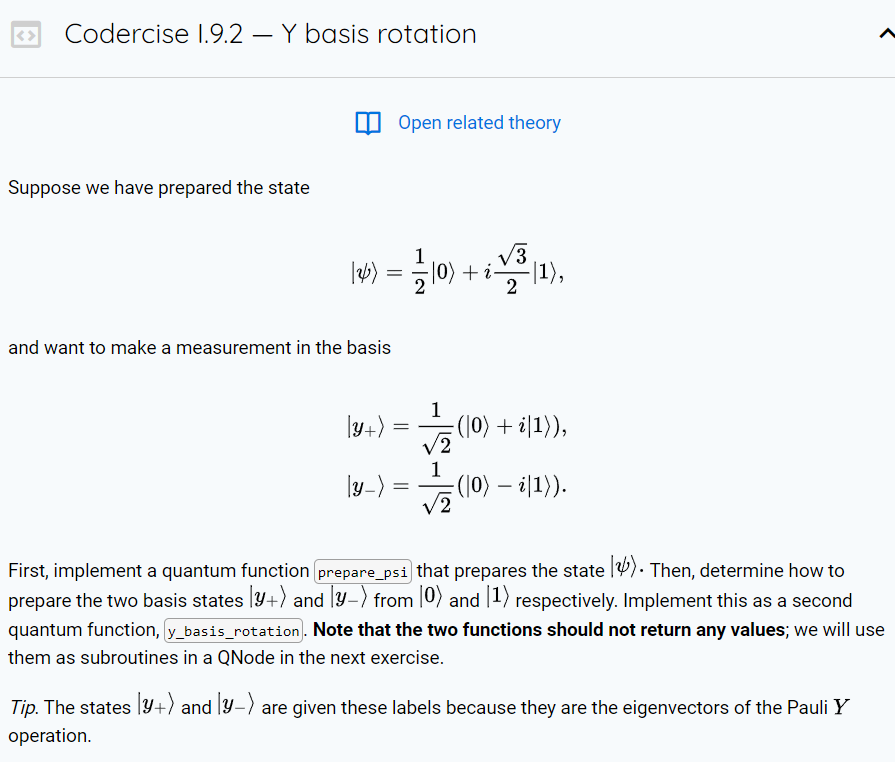

In [8]:
##################
# YOUR CODE HERE #
##################


# WRITE A QUANTUM FUNCTION THAT PREPARES (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_psi():
    v = np.array([1/2, 1j*np.sqrt(3)/2])
    qml.MottonenStatePreparation(v, wires=0)
    pass


# WRITE A QUANTUM FUNCTION THAT SENDS BOTH |0> TO |y_+> and |1> TO |y_->
def y_basis_rotation():
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    pass


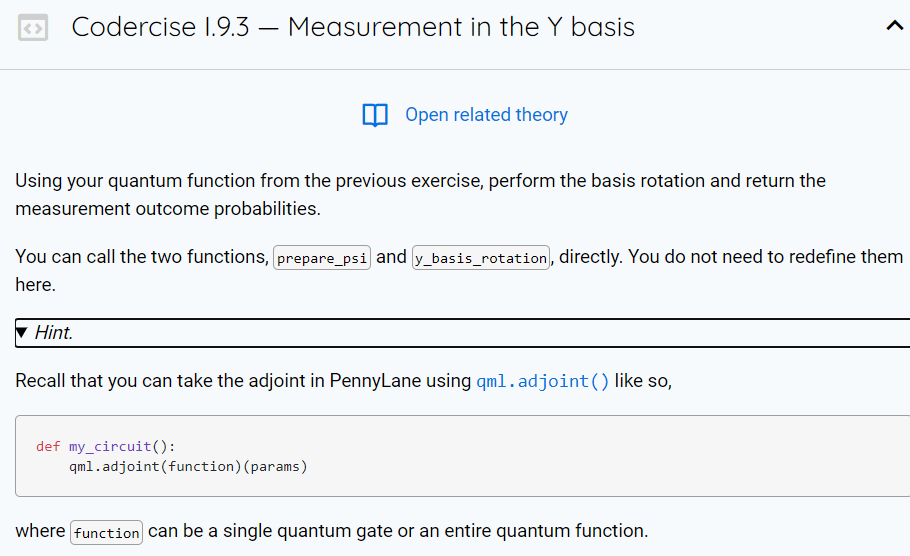

In [9]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def measure_in_y_basis():
    ##################
    # YOUR CODE HERE #
    ##################
    # PREPARE THE STATE
    # PERFORM THE ROTATION BACK TO COMPUTATIONAL BASIS
    # RETURN THE MEASUREMENT OUTCOME PROBABILITIES
    prepare_psi()
    qml.adjoint(y_basis_rotation)()
    return qml.probs(wires=0)


print(measure_in_y_basis())

[0.9330127 0.0669873]


                                                        WHAT DID YOU EXPECT?

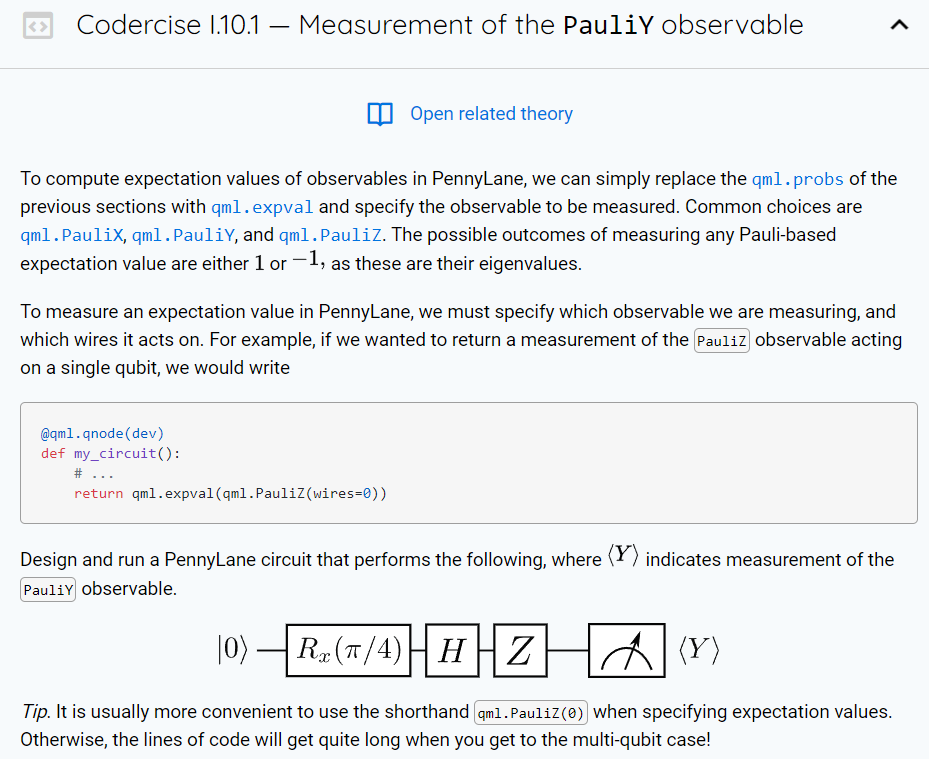

In [10]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def circuit():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.RX(np.pi/4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    
    # Measure the expectation value of Pauli-Y
    return qml.expval(qml.PauliY(0))
    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y
print(circuit())


-0.7071067811865471


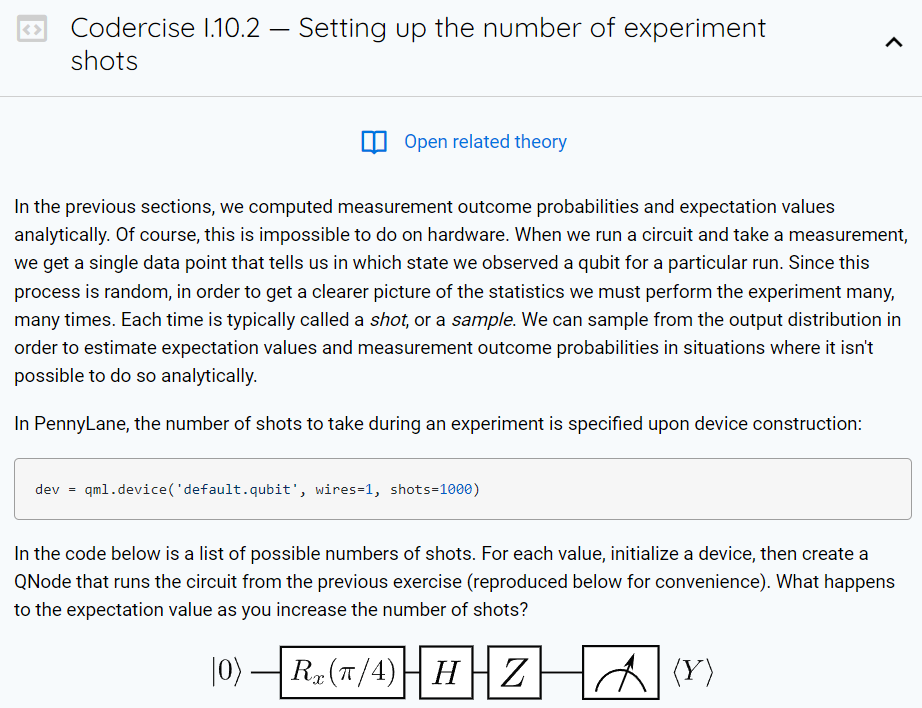

In [11]:
# An array to store your results
shot_results = []

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]

for shots in shot_values:
    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A DEVICE, CREATE A QNODE, AND RUN IT
    dev = qml.device('default.qubit', wires=1, shots=shots)
    @qml.qnode(dev)
    def circuit():
        qml.RX(np.pi/4, wires=0)
        qml.Hadamard(wires=0)
        qml.PauliZ(wires=0)
        return qml.expval(qml.PauliY(0))
    shot_results+=[circuit()]
    
    # STORE RESULT IN SHOT_RESULTS ARRAY
    pass

print(qml.math.unwrap(shot_results))


[-0.72, -0.708, -0.714, -0.71054, -0.706618]


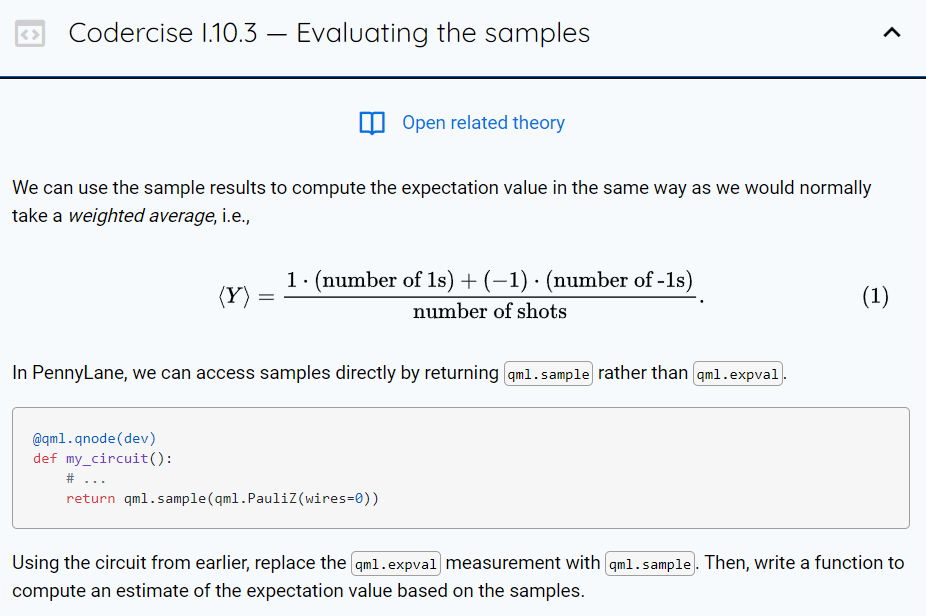

In [12]:
dev = qml.device("default.qubit", wires=1, shots=100000)


@qml.qnode(dev)
def circuit():
    qml.RX(np.pi / 4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # RETURN THE MEASUREMENT SAMPLES OF THE CORRECT OBSERVABLE

    return qml.sample(qml.PauliY(wires=0))


def compute_expval_from_samples(samples):
    """Compute the expectation value of an observable given a set of
    sample outputs. You can assume that there are two possible outcomes,
    1 and -1.

    Args:
        samples (np.array[float]): 100000 samples representing the results of
            running the above circuit.

    Returns:
        float: the expectation value computed based on samples.
    """

    estimated_expval = 0

    ##################
    # YOUR CODE HERE #
    ##################

    # USE THE SAMPLES TO ESTIMATE THE EXPECTATION VALUE
    estimated_expval = np.mean(samples)
    return estimated_expval


samples = circuit()
print(compute_expval_from_samples(samples))

-0.71104


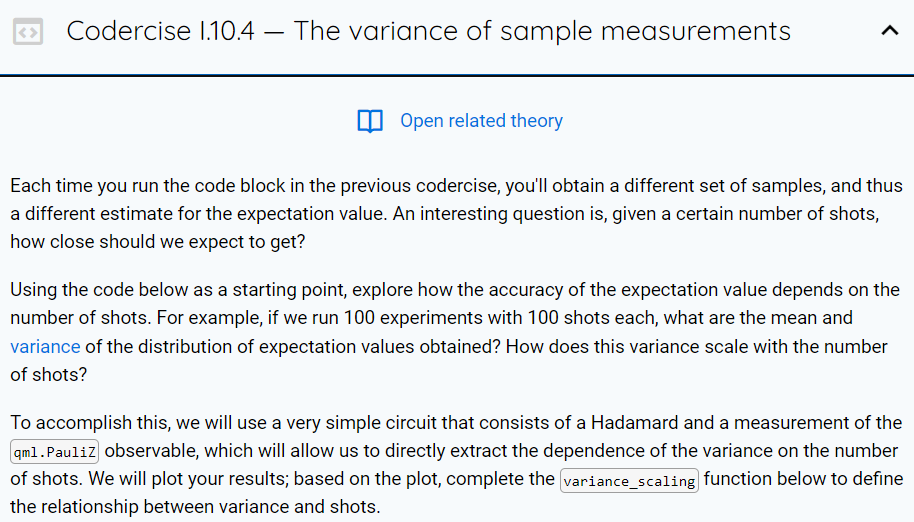

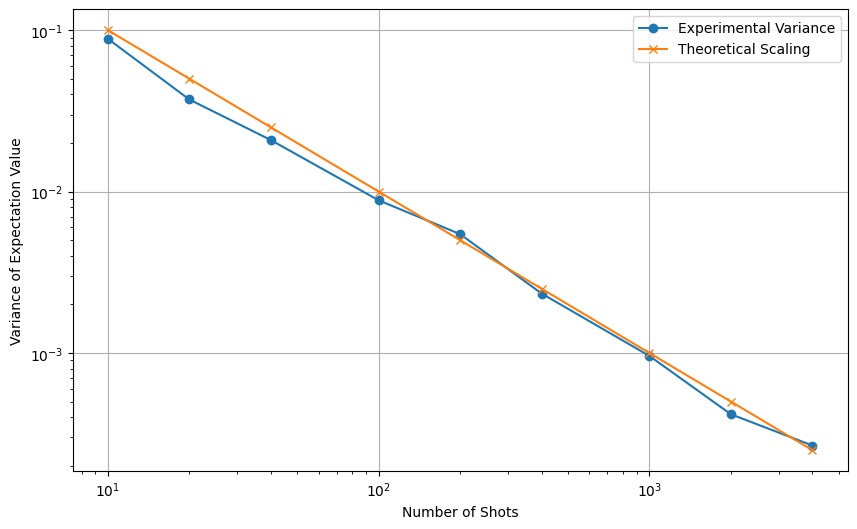

In [13]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

def variance_experiment(n_shots):
    """Run an experiment to determine the variance in an expectation
    value computed with a given number of shots.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we obtain running the
        circuit 100 times with n_shots shots each.
    """
    n_trials = 100

    # Create a device with the given number of shots
    dev = qml.device("default.qubit", wires=1, shots=n_shots)

    # Decorate the circuit to create a QNode
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires=0)
        return qml.expval(qml.PauliZ(wires=0))

    # Run the QNode n_trials times and collect the results
    results = [circuit() for _ in range(n_trials)]
    
    # Return the variance of the results
    return np.var(results)

def variance_scaling(n_shots):
    """Once you have determined how the variance in expectation value scales
    with the number of shots, complete this function to programmatically
    represent the relationship.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we expect to see when we run
        an experiment with n_shots shots.
    """
    # Theoretical variance scaling: variance ∝ 1/n_shots
    estimated_variance = 1 / n_shots
    return estimated_variance

# Various numbers of shots
shot_vals = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000]

# Run the experiments and compute the variance
results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]

# Plotting the results
def plotter(shot_vals, results_experiment, results_scaling):
    plt.figure(figsize=(10, 6))
    plt.plot(shot_vals, results_experiment, 'o-', label='Experimental Variance')
    plt.plot(shot_vals, results_scaling, 'x-', label='Theoretical Scaling')
    plt.xlabel('Number of Shots')
    plt.ylabel('Variance of Expectation Value')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()

plotter(shot_vals, results_experiment, results_scaling)


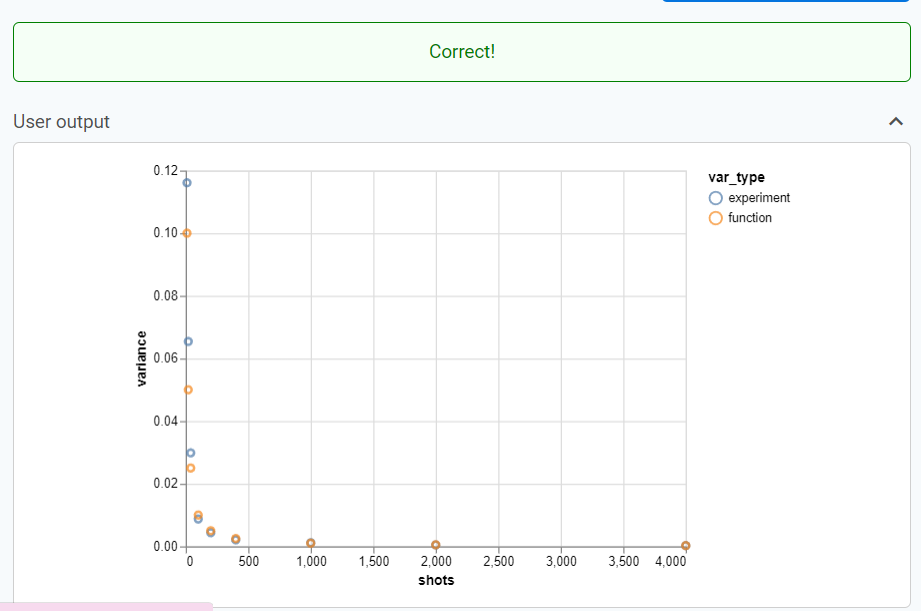

                                                Circuits with Many Qubits - CODEBOOK


                                                            MULTI-QUBIT SYSTEMS

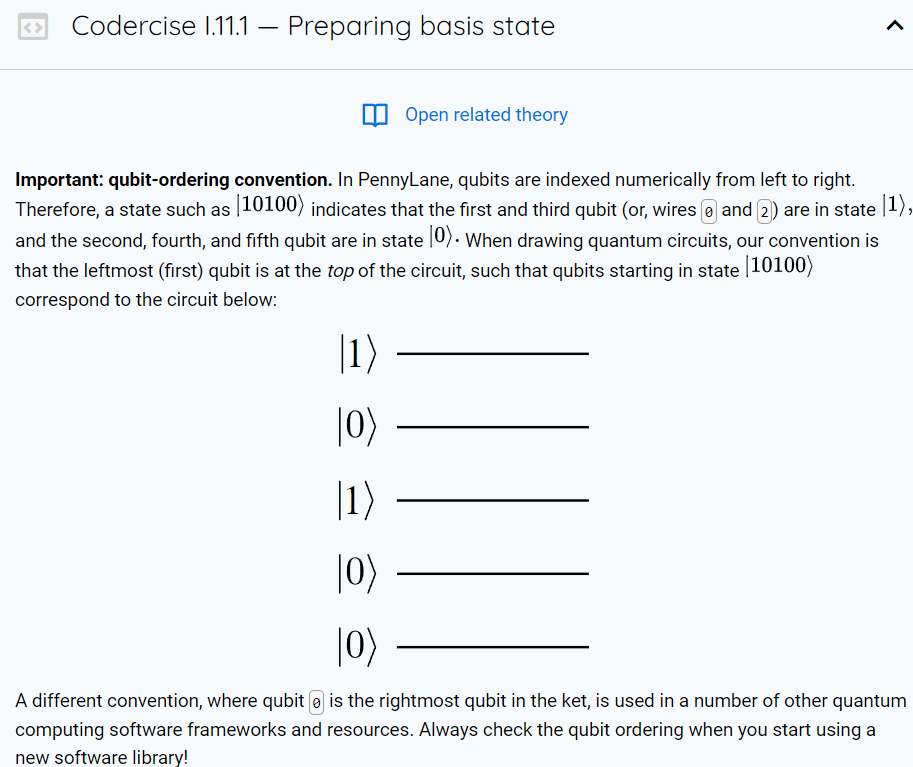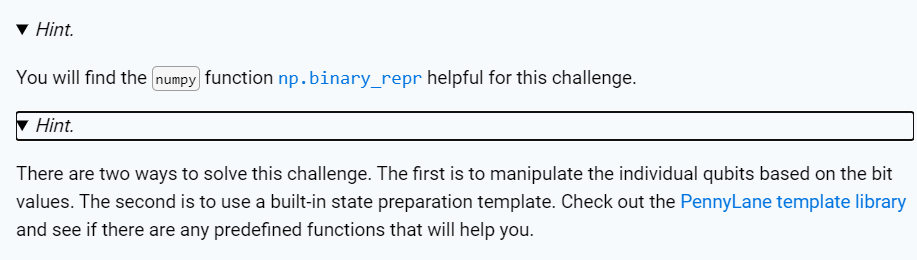

In [2]:
import pennylane as qml
import numpy as np
num_wires = 3
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def make_basis_state(basis_id):
    """Produce the 3-qubit basis state corresponding to |basis_id>.

    Note that the system starts in |000>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The computational basis state |basis_id>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE BASIS STATE
    
    # Convert the integer to its binary representation
    binary_str = np.binary_repr(basis_id, width=num_wires)
    
    # Convert the binary string to a list of integers
    basis_state = [int(bit) for bit in binary_str]
    
    # Use the BasisStatePreparation template to prepare the state
    qml.BasisStatePreparation(basis_state, wires=range(num_wires))
    return qml.state()


basis_id = 3
print(f"Output state = {make_basis_state(basis_id)}")


Output state = [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


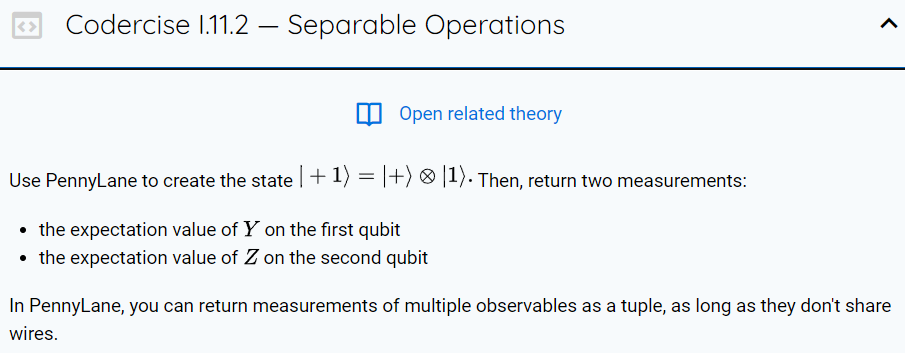

In [3]:
# Creates a device with *two* qubits
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def two_qubit_circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |+>|1>

    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT
    qml.Hadamard(wires=0)  # Creates |+> on the first qubit
    qml.PauliX(wires=1)    # Creates |1> on the second qubit

    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT
    return qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(1))


print(two_qubit_circuit())


(tensor(0., requires_grad=True), tensor(-1., requires_grad=True))


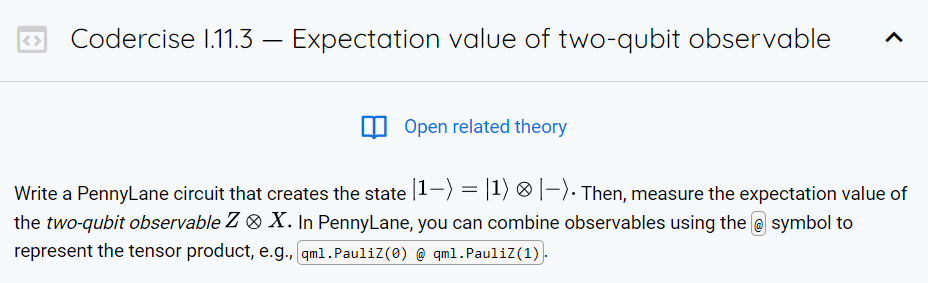

In [4]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def create_one_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |1>|->
    qml.PauliX(wires=0)  # Creates |1> on the first qubit
    qml.PauliX(wires=1)  # Creates |1> on the second qubit
    qml.Hadamard(wires=1)  # Transforms |1> to |-> on the second qubit

    # RETURN A SINGLE EXPECTATION VALUE Z \otimes X
    return qml.expval(qml.PauliZ(0) @ qml.PauliX(1))


print(create_one_minus())


0.9999999999999996


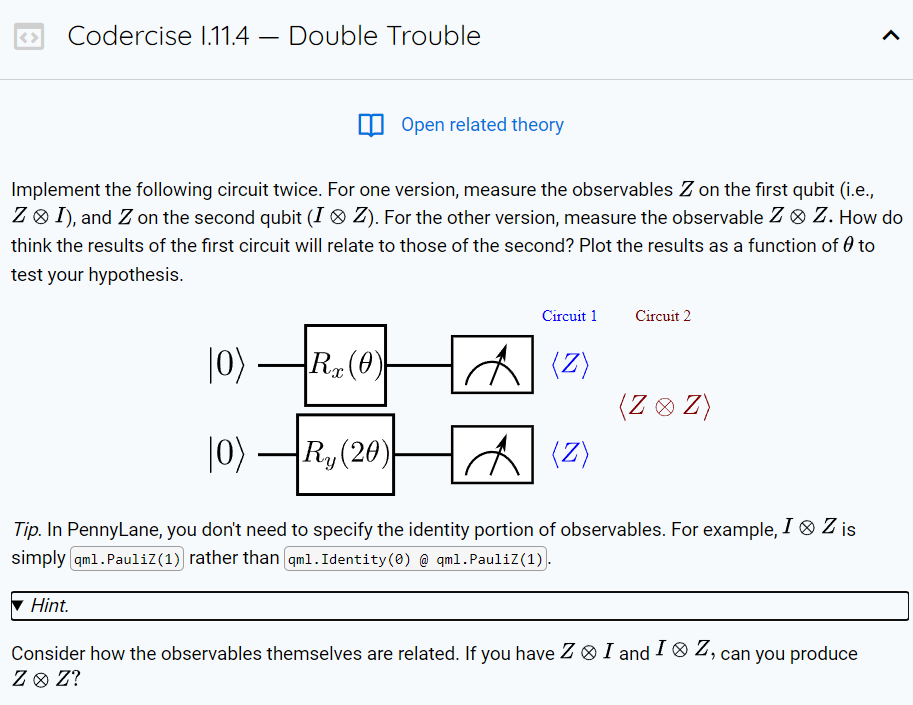

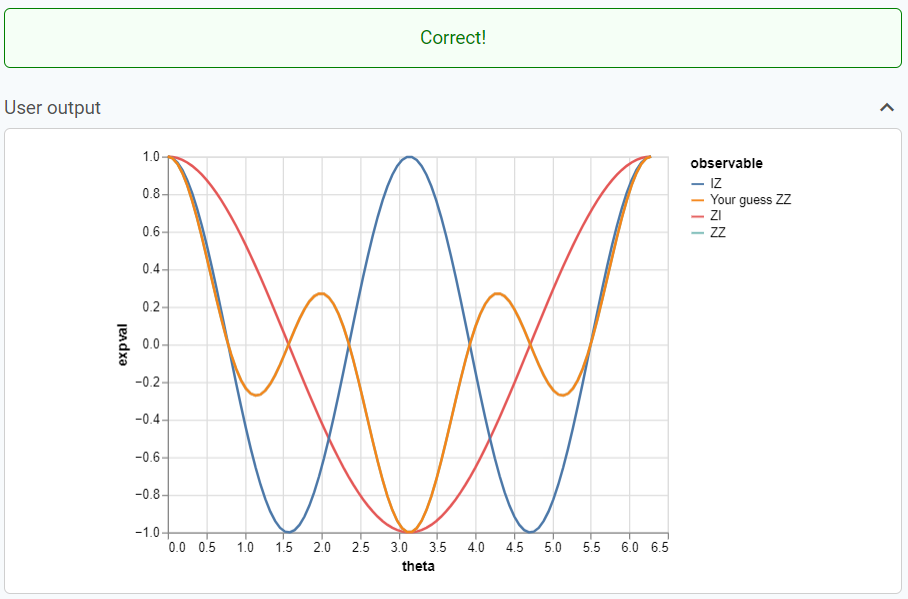

                                                        ALL TIED UP

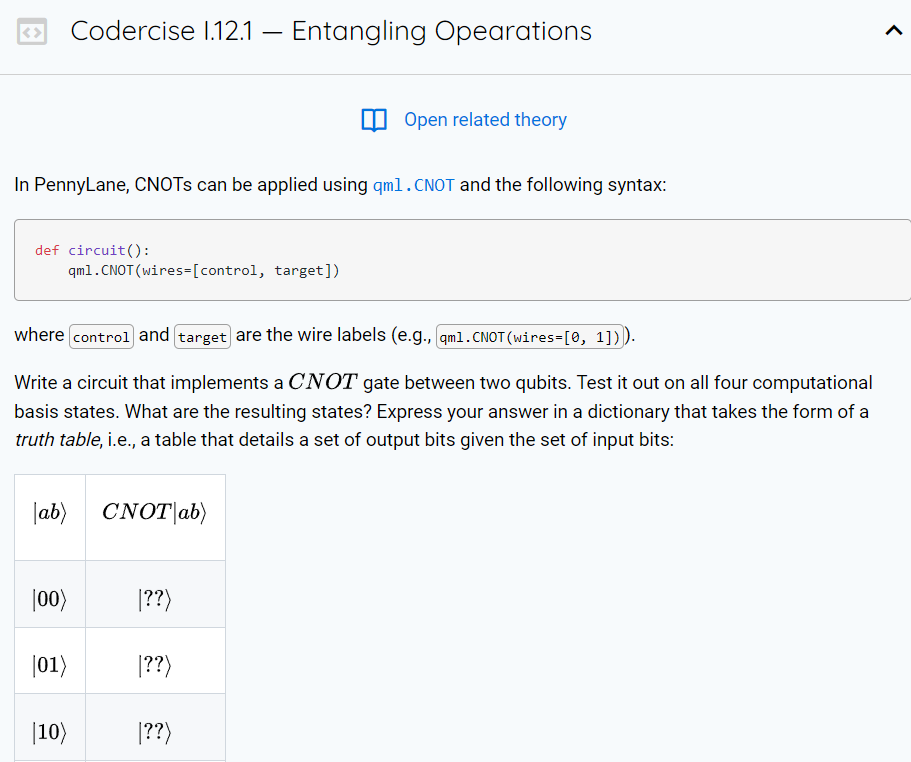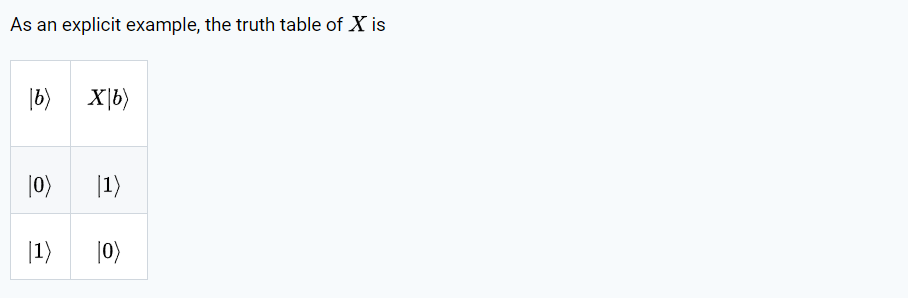

In [5]:
num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def apply_cnot(basis_id):
    """Apply a CNOT to |basis_id>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The resulting state after applying CNOT|basis_id>.
    """

    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE CNOT
    qml.CNOT(wires=[0, 1])
    return qml.state()


##################
# YOUR CODE HERE #
##################

# REPLACE THE BIT STRINGS VALUES BELOW WITH THE CORRECT ONES
cnot_truth_table = {"00": "00", "01": "00", "10": "00", "11": "00"}
for basis_id in range(4):
    input_state = f"{basis_id:02b}"
    output_state = apply_cnot(basis_id)
    
    # Find the non-zero index in the output state
    output_index = np.argmax(np.abs(output_state))
    output_bits = f"{output_index:02b}"
    
    cnot_truth_table[input_state] = output_bits

# Run your QNode with various inputs to help fill in your truth table
print(apply_cnot(0))


[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


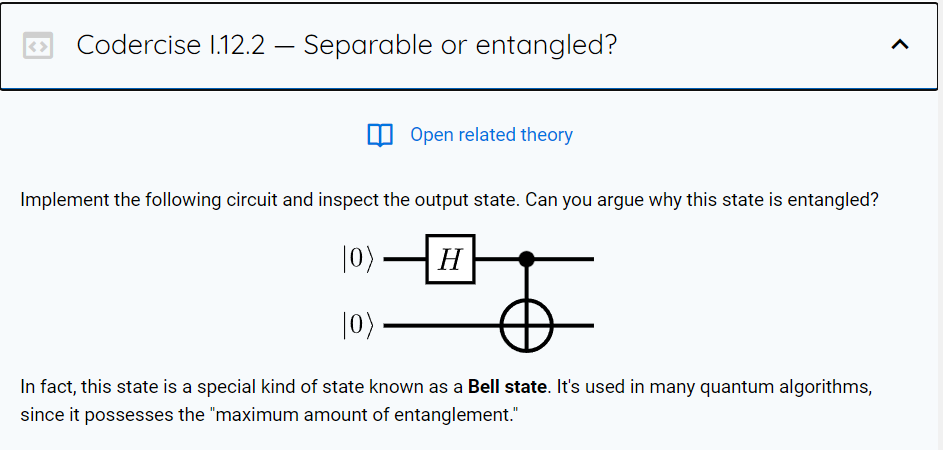

In [6]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def apply_h_cnot():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()


print(apply_h_cnot())

##################
# YOUR CODE HERE #
##################

# SET THIS AS 'separable' OR 'entangled' BASED ON YOUR OUTCOME
state_status = "entangled"


[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


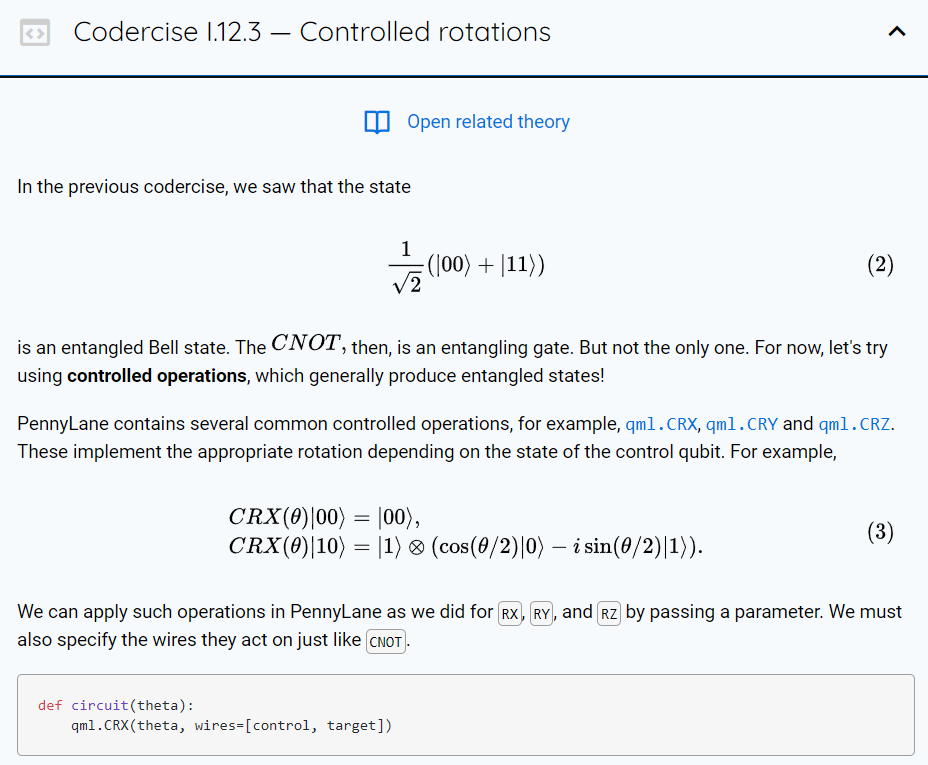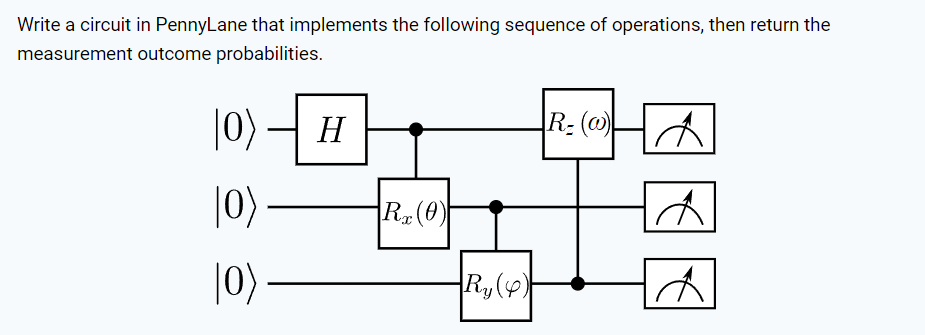

In [7]:
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):
    """Implement the circuit above and return measurement outcome probabilities.

    Args:
        theta (float): A rotation angle
        phi (float): A rotation angle
        omega (float): A rotation angle

    Returns:
        np.array[float]: Measurement outcome probabilities of the 3-qubit
        computational basis states.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT AND RETURN MEASUREMENT PROBABILITIES
    # Apply Hadamard gate to the first qubit
    qml.Hadamard(wires=0)
    
    # Apply controlled-RX rotation
    qml.CRX(theta, wires=[0, 1])
    
    # Apply controlled-RY rotation
    qml.CRY(phi, wires=[1, 2])
    
    # Apply controlled-RZ rotation
    qml.CRZ(omega, wires=[0, 2])
    
    # Measure all qubits in the computational basis
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3
print(controlled_rotations(theta, phi, omega))


[5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.98751041e-01 0.00000000e+00 1.23651067e-03 1.24480103e-05]


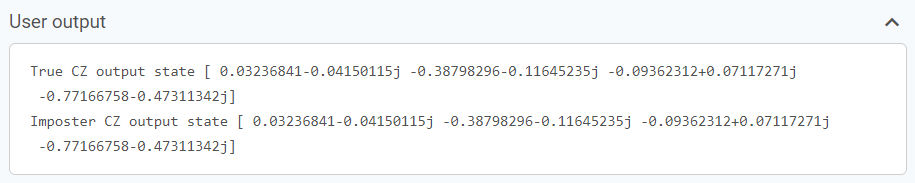

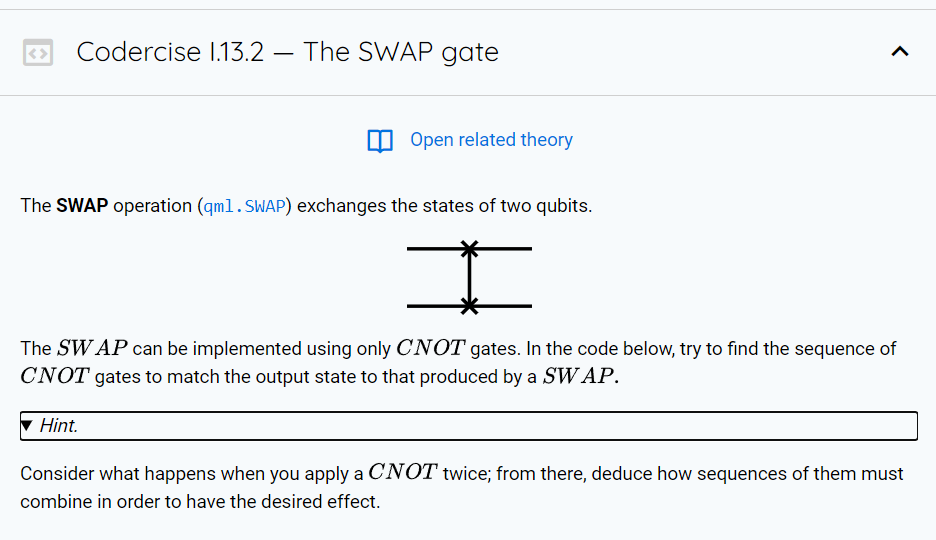

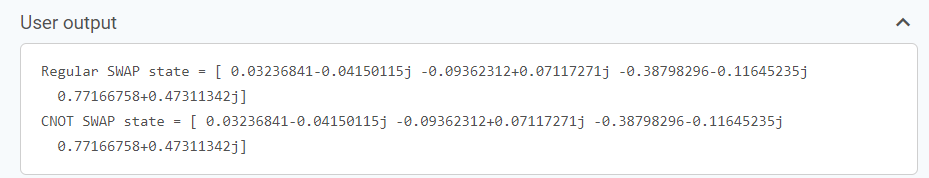

This implementation works because:

The first CNOT (control on qubit 0, target on qubit 1) copies the state of qubit 0 to qubit 1.
The second CNOT (control on qubit 1, target on qubit 0) copies the original state of qubit 1 to qubit 0.
The third CNOT (control on qubit 0, target on qubit 1) clears the extra information from the first CNOT.

The net effect is that the states of qubit 0 and qubit 1 are swapped.
This sequence of CNOT gates is equivalent to a SWAP operation, and the output states from both functions should be identical, demonstrating that we can indeed implement a SWAP gate using only CNOT gates.

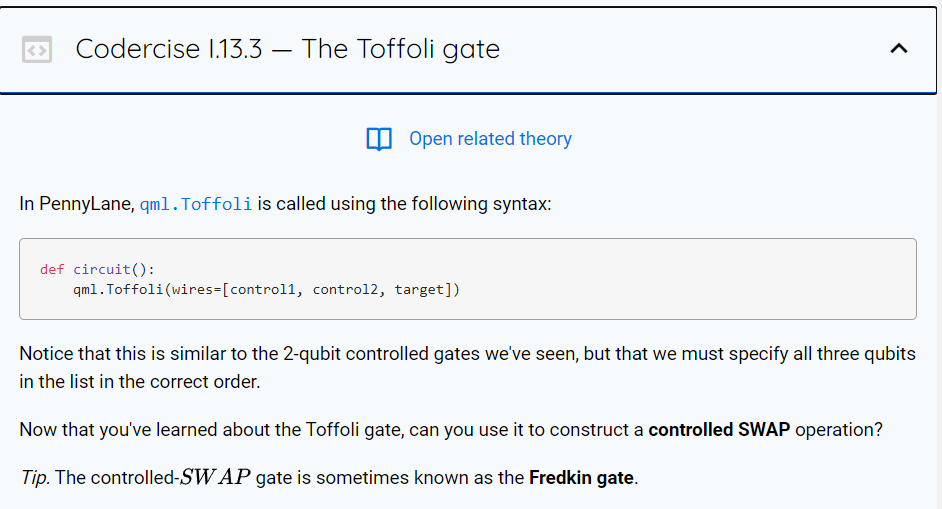

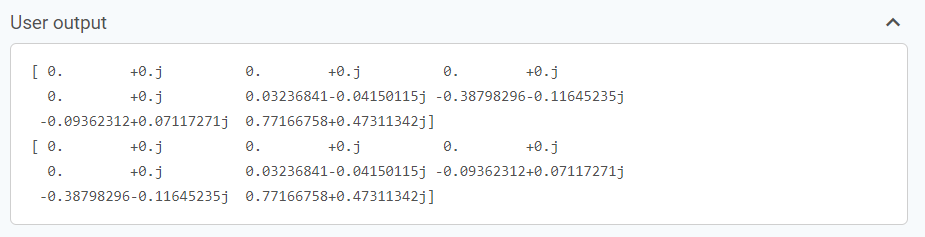

To implement a controlled SWAP operation using Toffoli gates in PennyLane, you need to sequence the Toffoli gates appropriately. A controlled SWAP (CSWAP) gate swaps two qubits if and only if a control qubit is in the state ∣1⟩.

Apply a Toffoli gate where the control qubit and one of the target qubits are the control qubits and the other target qubit is the target qubit.
Apply a second Toffoli gate where the control qubit and the previously swapped target qubit are the control qubits and the first target qubit is the target.
Apply a third Toffoli gate similarly to the first one to complete the SWAP operation.

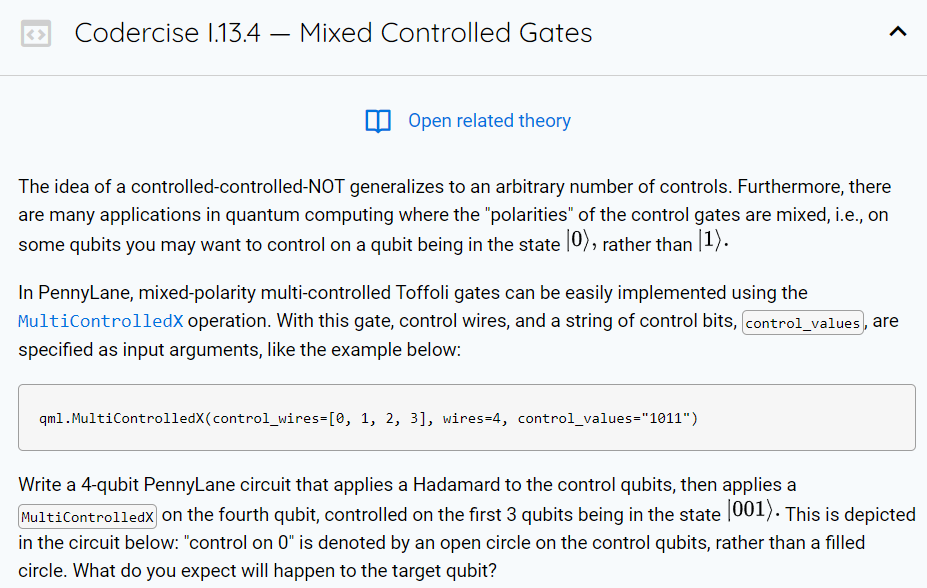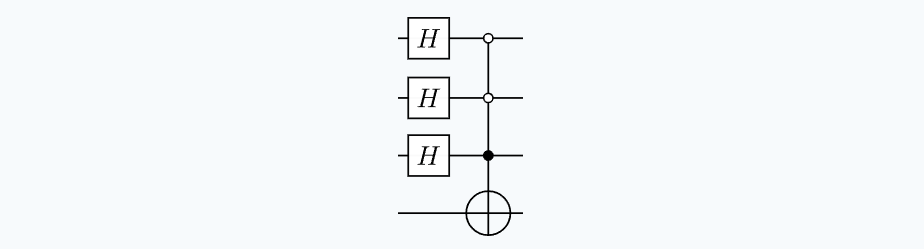

In [11]:
dev = qml.device("default.qubit", wires=4)


@qml.qnode(dev)
def four_qubit_mcx():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT ABOVE USING A 4-QUBIT MULTI-CONTROLLED X
    for i in range(3):
        qml.Hadamard(wires=i)
    qml.MultiControlledX(control_wires=[0, 1, 2], wires=3, control_values="001")
    return qml.state()


print(four_qubit_mcx())


[0.35355339+0.j 0.        +0.j 0.        +0.j 0.35355339+0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j]


D:\anaconda_new\envs\womanium\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:1045: PennyLaneDeprecationWarning: Specifying control values using a bitstring is deprecated, and will not be supported in future releases, Use a list of booleans or integers instead.
  warnings.warn(
D:\anaconda_new\envs\womanium\Lib\site-packages\pennylane\ops\op_math\controlled_ops.py:1051: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


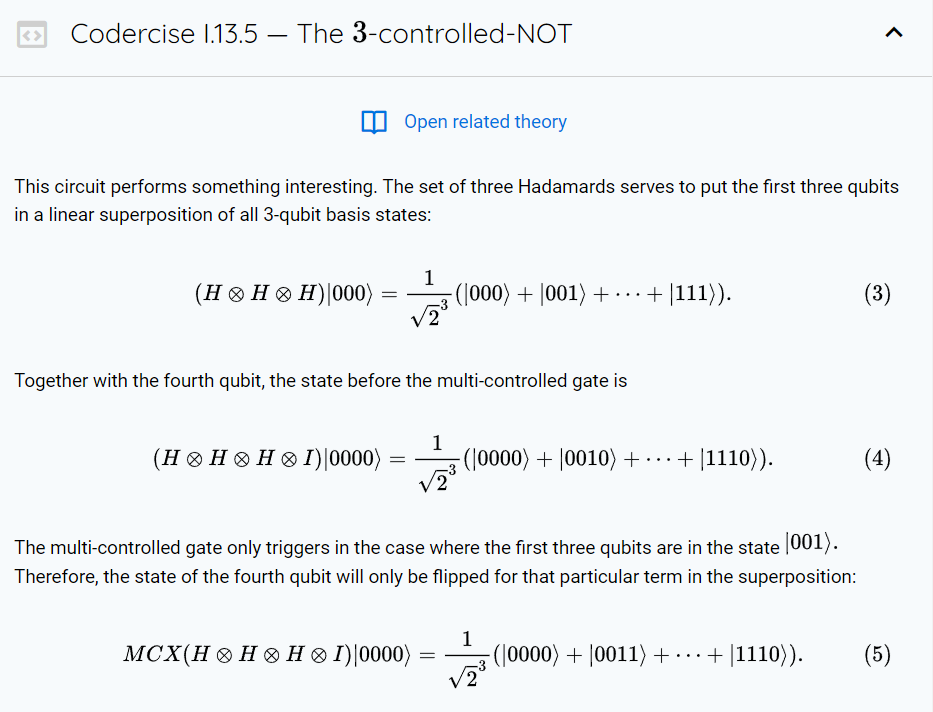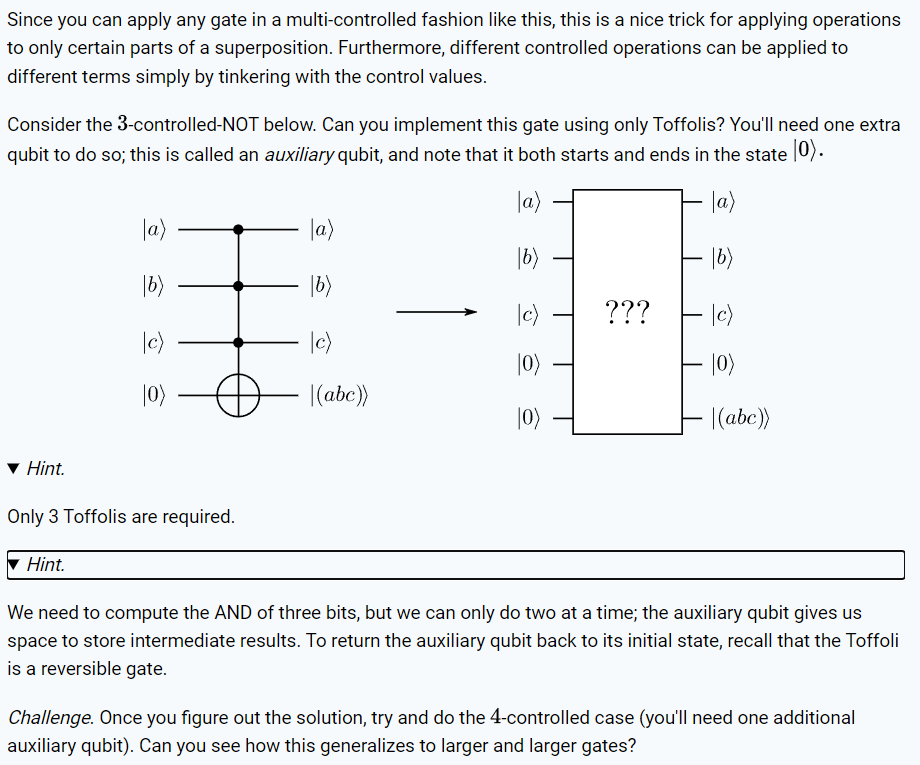

In [13]:
# Wires 0, 1, 2 are the control qubits
# Wire 3 is the auxiliary qubit
# Wire 4 is the target
dev = qml.device("default.qubit", wires=5)


@qml.qnode(dev)
def four_qubit_mcx_only_tofs():
    # We will initialize the control qubits in state |1> so you can see
    # how the output state gets changed.
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.PauliX(wires=2)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT A 3-CONTROLLED NOT WITH TOFFOLIS
    qml.Toffoli(wires=[0, 1, 3])  # AND of first two controls into auxiliary
    qml.Toffoli(wires=[2, 3, 4])  # Control on third input and auxiliary, target is final qubit
    qml.Toffoli(wires=[0, 1, 3])  # Undo first Toffoli to reset auxiliary
    return qml.state()


print(four_qubit_mcx_only_tofs())


[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j
 0.+0.j 0.+0.j]


                                                        MULTI-QUBIT GATE CHALLENGE

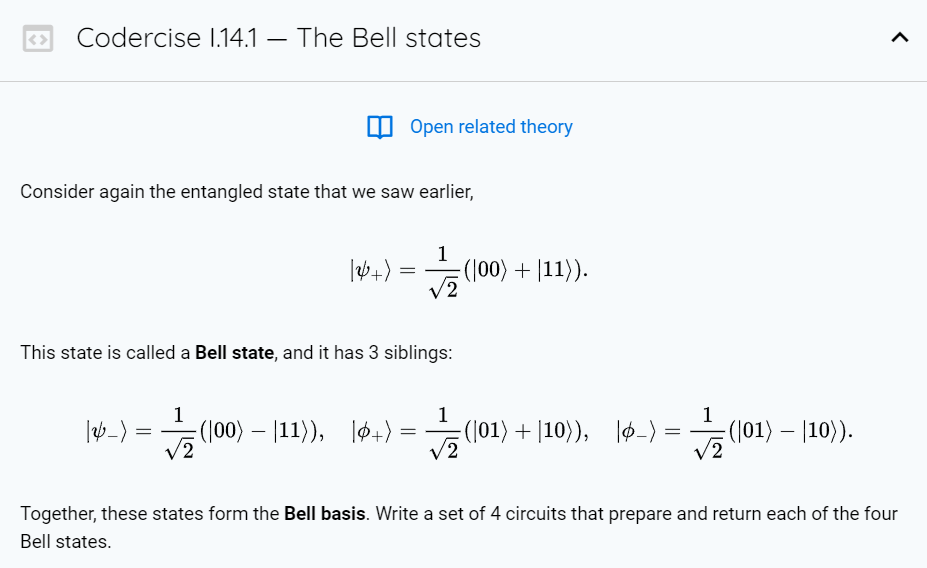

In [14]:
dev = qml.device("default.qubit", wires=2)

# Starting from the state |00>, implement a PennyLane circuit
# to construct each of the Bell basis states.


@qml.qnode(dev)
def prepare_psi_plus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE (1/sqrt(2)) (|00> + |11>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()


@qml.qnode(dev)
def prepare_psi_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE (1/sqrt(2)) (|00> - |11>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliZ(wires=0)  # Apply Z to the first qubit to introduce the relative phase
    return qml.state()


@qml.qnode(dev)
def prepare_phi_plus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE  (1/sqrt(2)) (|01> + |10>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliX(wires=1)  # Apply X to the second qubit to flip its state
    return qml.state()


@qml.qnode(dev)
def prepare_phi_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE  (1/sqrt(2)) (|01> - |10>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliX(wires=1)  # Apply X to the second qubit to flip its state
    qml.PauliZ(wires=0)  # Apply Z to the first qubit to introduce the relative phase
    return qml.state()


psi_plus = prepare_psi_plus()
psi_minus = prepare_psi_minus()
phi_plus = prepare_phi_plus()
phi_minus = prepare_phi_minus()

# Uncomment to print results
# print(f"|ψ_+> = {psi_plus}")
# print(f"|ψ_-> = {psi_minus}")
# print(f"|ϕ_+> = {phi_plus}")
# print(f"|ϕ_-> = {phi_minus}")


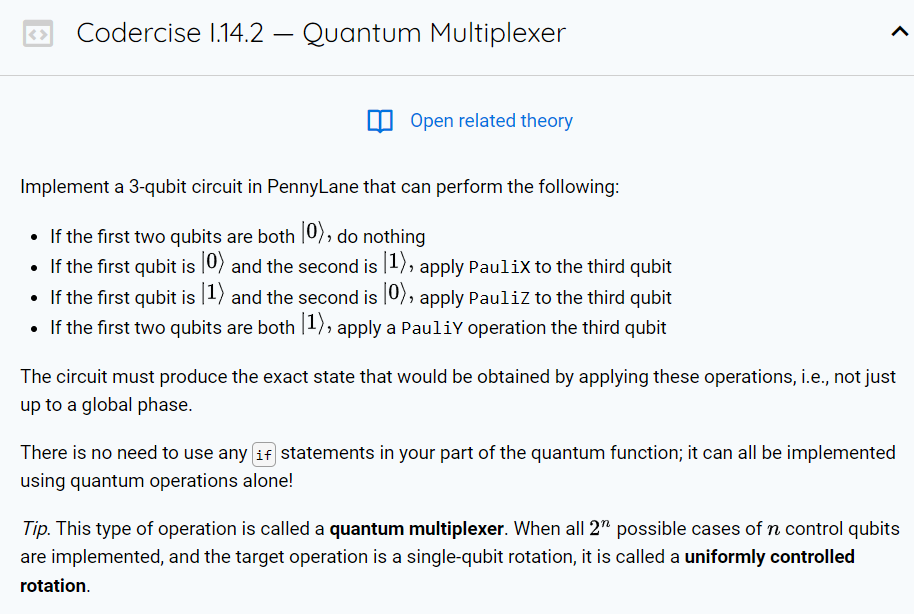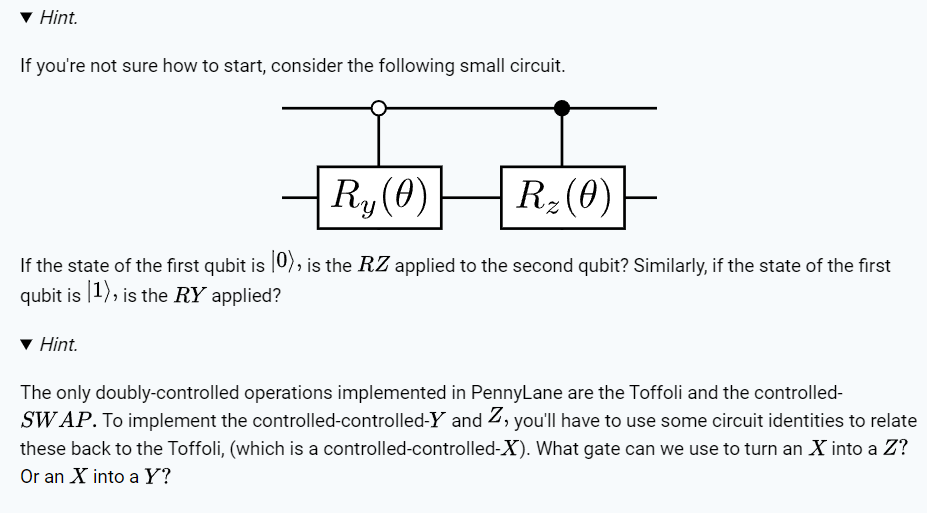

In [15]:
dev = qml.device("default.qubit", wires=3)

# State of first 2 qubits
state = [0, 1]


@qml.qnode(device=dev)
def apply_control_sequence(state):
    # Set up initial state of the first two qubits
    if state[0] == 1:
        qml.PauliX(wires=0)
    if state[1] == 1:
        qml.PauliX(wires=1)

    # Set up initial state of the third qubit - use |->
    # so we can see the effect on the output
    qml.PauliX(wires=2)
    qml.Hadamard(wires=2)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE MULTIPLEXER
    # IF STATE OF FIRST TWO QUBITS IS 01, APPLY X TO THIRD QUBIT
    qml.ctrl(qml.PauliX, control=[0, 1], control_values=[0, 1])(wires=2)
    # IF STATE OF FIRST TWO QUBITS IS 10, APPLY Z TO THIRD QUBIT
    qml.ctrl(qml.PauliZ, control=[0, 1], control_values=[1, 0])(wires=2)
    # IF STATE OF FIRST TWO QUBITS IS 11, APPLY Y TO THIRD QUBIT
    qml.ctrl(qml.PauliY, control=[0, 1], control_values=[1, 1])(wires=2)
    return qml.state()


print(apply_control_sequence(state))


[ 0.        +0.j  0.        +0.j -0.70710678+0.j  0.70710678+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
